# **ECOMMERCE CUSTOMER CHURN PREDICTION AND ANALYSIS**

By: 
1. Kenshi Poneva Y.
2. Luthfi Ghina Barka

# **1. BUSINESS PROBLEM AND DATA UNDERSTANDING**

## *1.1 Context*

Pada dasarnya, customer churn terjadi ketika pelanggan yang berhenti menggunakan produk atau layanan dari suatu bisnis di perusahaan. Perpindahan atau kehilangan pelanggan adalah salah satu masalah paling krusial bagi bisnis apapun yang secara langsung menjual atau melayani pelanggan, salah satunya adalah bisnis e-commerce.

Di kasus ini, sebuah perusahaan e-commerce memiliki masalah churn dimana 16,8% pelanggannya melakukan churn pada periode terakhir. Dengan alasan ini, e-commerce bersangkutan telah mengontrak kami dalam sebuah proyek untuk membangun model prediktif yang akurat. 

Oleh karena itu, tugas kami sebagai data scientist adalah mengidentifikasi masalah, menganalisa data untuk mendapatkan insights, membuat model machine learning dengan algoritma yang mampu memprediksi seakurat mungkin pada pelanggan yang churn dan tidak, dan memberikan rekomendasi berdasarkan hasil yang kita dapat secara keseluruhan.

Berikut adalah definisi masing-masing label pada e-commerce ini:  
 
    0 = Pelanggan yang tidak churn (loyal customer)  
    Pelanggan yang tidak churn di perusahaan ini ditandai dengan angka yang cenderung tinggi pada hari terakhir mereka bertransaksi, jumlah order, serta lama berlangganan. 
    
    1 = Pelanggan yang churn (berhenti/pindah) 
    Pelanggan yang tidak churn di perusahaan ini ditandai dengan angka yang cenderung rendah pada hari terakhir mereka bertransaksi, jumlah order, serta jenis barang yang dibeli (pembelian barang elektronik yang cenderung churn). 

## *1.2 Problem Understanding*

Faktanya, persentase pelanggan yang hilang tersebut berpengaruh terhadap growth rate perusahaan, ini merupakan alasan utama yang menjadikan customer churn rate begitu penting terutama di bisnis e-commerce. 

Selain itu, sebuah survey membuktikan bahwa:
- mendapatkan pelanggan baru bisa menghabiskan biaya sekitar 5x lipat dibandingkan jika kita memelihara hubungan pelanggan yang sudah ada. 
- Tingkat keberhasilan (success rate) pada penjualan ke pelanggan yang sudah ada adalah 60-70%, sedangkan tingkat keberhasilan penjualan ke pelanggan baru adalah 5-20%. 
- Meningkatkan tingkat retensi pelanggan sebesar 5% meningkatkan keuntungan sebesar 25-95%.

Dengan alasan ini, dibandingkan jika kita melakukan customer acquisition, memperhatikan dan meningkatkan hubungan dengan pelanggan yang sudah ada akan memberikan keuntungan jangka panjang pada perusahaan seperti peningkatan customer life value dan pengaruhnya terhadap profit perusahaan. Namun tantangannya adalah, jika kita tidak tahu pelanggan manakah yang akan churn maka kita akan cenderung menargetkan semua pelanggan dimana ini dapat menyia-nyiakan biaya retention cost. 


Source: 
https://www.profitwell.com/recur/all/customer-acquisition-vs-retention  
https://www.huify.com/blog/acquisition-vs-retention-customer-lifetime-value


## *1.3 Problem Statement*

Setelah memahami latar belakang permasalahan, kita mampu menyimpulkan problem statement pada projek ini. Ada 2 poin penting yang menjadi landasan kita yaitu Goals dan Values. Goals kita disini sesuai konteks yang sudah dijelaskan di awal yaitu untuk memprediksi customer churn seakurat mungkin dengan tujuan utama kita yaitu untuk meminimalkan biaya retention cost dan juga meningkatkan customer life value.

Disini kita akan melakukan prediksi menggunakan machine learning dengan metode Supervised Learning (Binary Classification). Selain memberikan prediksi pada customer churn, pihak manajemen juga berharap bisa mengetahui faktor/variabel yang mempengaruhi seorang pelanggan yang churn atau tidak, sehingga mereka dapat membuat strategi yang baik dalam mengurangi tingkat churn yang tinggi.

## *1.4 Analytic Approach*

Pertama kita akan menganalisa data untuk menemukan informasi baru yang berguna bagi stakeholder untuk diketahui.

Kemudian kita akan mengevaluasi beberapa model klasifikasi yang memberikan prediksi paling akurat pada seorang pelanggan yang akan/ingin berhenti menggunakan produk/layanan.

## *1.5 Metric Evaluation*


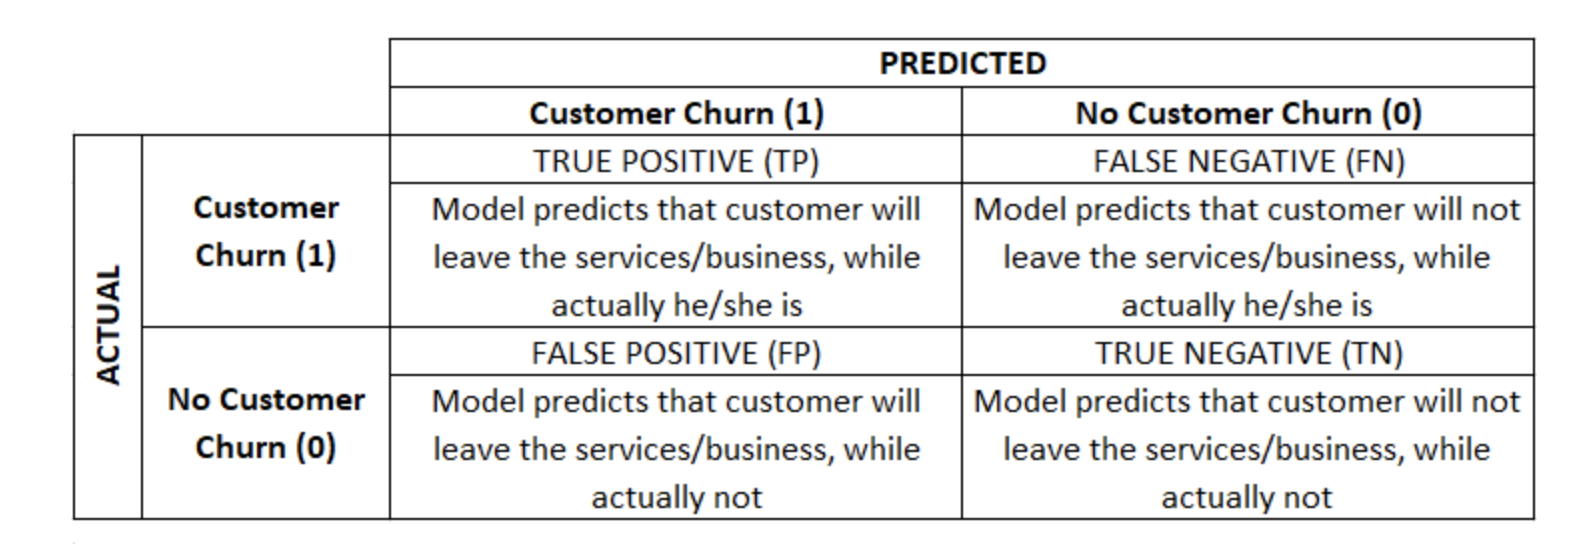

In [305]:
%matplotlib inline
from IPython.display import Image
Image('/Users/kponeva/Documents/Courses/Data Science/JC Data Science Purwadhika/Final Project/Ecommerce Churn/matrix-1.png')

> **Summary**

Type 1 error : False Positive (memprediksi churn namun faktanya salah)   
Konsekuensi : sia-sianya biaya yang dikeluarkan untuk para customer yang padahal tidak churn.

Type 2 error : False Negative (memprediksi tidak churn namun faktanya salah)    
Konsekuensi : kehilangan pelanggan yang berpotensi loyal akan mempengaruhi tingkat CLV dan pertumbuhan bisnis.

**Metric Analysis**  

Mengacu pada *metric evaluation* diatas, kita perlu meminimalisir bagian False Negative Rate (meningkatkan CLV). Jika model gagal dalam meminimalkan False Negative Rate (Type 2 error), artinya pelanggan yang harusnya churn diprediksi oleh model sebagai pelanggan tidak churn. Jika ini terjadi, maka perusahaan akan mengalami kehilangan pelanggan yang dapat menurunkan Customer Life Value sehingga mempengaruhi pendapatan perusahaan itu sendiri.

Namun, kita juga harus memperhatikan angka False Positive (Type 1 error) pada hasil prediksi. Jika tinggi, berarti model salah memprediksi pelanggan yang tidak churn. Ini akan menyebabkan biaya yang terbuang sia-sia karena menindaklanjuti pelanggan yang padahal tidak akan churn namun diprediksi churn. 

Jadi, model yang kita cari adalah model yang memberikan prediksi akurat pada kelas positif dengan nilai recall setinggi mungkin untuk menghindari kehilangan pelanggan berpotensi loyal diikuti dengan nilai Precision yang juga harus sama tingginya untuk menghindari terbuangnya biaya yang dialokasikan. Jadi kita harus menyeimbangkan antara precision dan recall dari 1 kelas positive. Maka metric utama yang akan kita gunakan adalah **f1-score** namun tetap memperhatikan nilai **recall** agar lebih tinggi dari **precision**. Selain itu, tujuan menggunakan f1-score adalah salah satu metode untuk mengatasi ketidakseimbangan data pada kelas positif (churn) dan kelas negatif (not churn).

## *1.6 Data Understanding*

In [306]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline 
from scipy.stats import chi2_contingency

# Model stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Engineering
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier , RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool

# Metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
import sklearn.metrics as metrics

import shap 
from shap import initjs, force_plot

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [307]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
description = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[2,3])
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### **Data Source**

https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

### **Who created the data?**

ANKIT VERMA

### **When created the data?**

Date created: 2021-01-26 

### **About this file**
Kumpulan data milik perusahaan ECommerce online terkemuka. Sebuah perusahaan ingin mengetahui pelanggan mana yang akan churn, sehingga mereka dapat mengambil tindakan tepat waktu contohnya dengan menawarkan pelanggan yang diprediksi churn berbagai macam promo. 

Berdasarkan dataset, terdapat 5630 observasi dengan 20 kolom fitur. Kolom churn juga menunjukkan apakah pelanggan akan churn atau tidak dengan angka binary. Kesimpulannya, variabel target adalah churn, dan semua kolom lainnya menjadi variabel fitur.


In [308]:
df.shape

(5630, 20)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### **Deskripsi Data**

Kita memiliki total dua puluh kolom dari dataset.

Deskripsi Kolom :

1.  CustomerID                  : Nomor identitas pengguna
2.  Churn                       : Identifikasi pengguna churn atau tidak.
                                    Jika bernilai 1 maka pengguna churn,
                                    Jika bernilai 0 maka pengguna tidak churn    
3.  Tenure                      : Masa pengguna berlangganan pada produk ini
4.  PreferredLoginDevice        : Perangkat yang sering digunakan untuk login
5.  CityTier                    : Klasifikasi kota berdasarkan tingkat kesejahteraan di kota tersebut
                                    1 = daerah Perkotaan
                                    2 = daerah Pedesaan
                                    3 = daerah Tertinggal
6.  WarehouseToHome             : Jarak antara gudang dan rumah pengguna
7.  PreferredPaymentMode        : Metode pembayaran yang sering digunakan untuk pengguna
8.  Gender                      : Jenis kelamin pengguna
9.  HourSpendOnApp              : Jam yang dihabiskan untuk menggunakan aplikasi atau website
10. NumberOfDeviceRegistered    : Jumlah perangkat yang diregistrasikan terhadap satu pengguna/akun
11. PreferredOrderCat           : Kategori yang sering dipesan dalam satu bulan terakhir
12. SatisfactionScore           : Nilai kepuasan pelanggan terhadap pelayanan
13. MaritalStatus               : Status pernikahan pelanggan
14. NumberOfAddress             : Jumlah alamat yang terdaftar dalam satu pengguna
15. Complain                    : Keluhan yang diajukan dalam satu bulan terakhir
16. OrderAmountHikeFromLastYear : Persentase peningkatan pesanan dalam satu tahun terakhir
17. CouponUsed                  : Jumlah kupon yang digunakan dalam satu bulan terakhir
18. OrderCount                  : Jumlah pesanan dalam satu bulan terakhir
19. DaySinceLastOrder           : Hari terakhir pemesanan yang dilakukan oleh pelanggan 
20. CashbackAmount              : Rata-rata cashback dalam satu bulan terakhir 

# **2. EXPLANATORY DATA ANALYSIS**

In [310]:
# drop CustomerID column

df.drop('CustomerID', axis = 1, inplace = True)

In [311]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## *2.1 Description Summary*

Dari deskripsi data diatas, didapatkan informasi bahwa dataset memiliki 15 fitur kuantitatif atau tipe data numerik dengan nilai central of tendencies (mean, median, modus) serta sebaran data (Q1,Q2,Q3,std) yang bervariasi. Kita mendapatkan informasi juga bahwa kemungkinan ditemukan outlier di dalam distribusi data yang terlihat dari nilai std yang sangat besar karena mendekati nilai mean/median atau jarak data antara data max dan min yang sangat jauh.

Maka dari itu, kita akan mengecek distribusi data dari setiap fitur untuk memastikan perlakuan apa yang akan kita lakukan kepada dataset.

In [312]:
# cek distribusi data

from scipy.stats import normaltest

kolom=['Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore',
       'NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
distribusi=[]
for i in kolom:
    stats, pval=normaltest(df[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
Churn,tidak normal
Tenure,tidak normal
CityTier,tidak normal
WarehouseToHome,tidak normal
HourSpendOnApp,tidak normal
NumberOfDeviceRegistered,tidak normal
SatisfactionScore,tidak normal
NumberOfAddress,tidak normal
Complain,tidak normal
OrderAmountHikeFromlastYear,tidak normal


'Data kuantitatif memiliki distribusi data tidak normal, \nsehingga kita akan menggunakan ukuran data median sebelum melakukan EDA.'

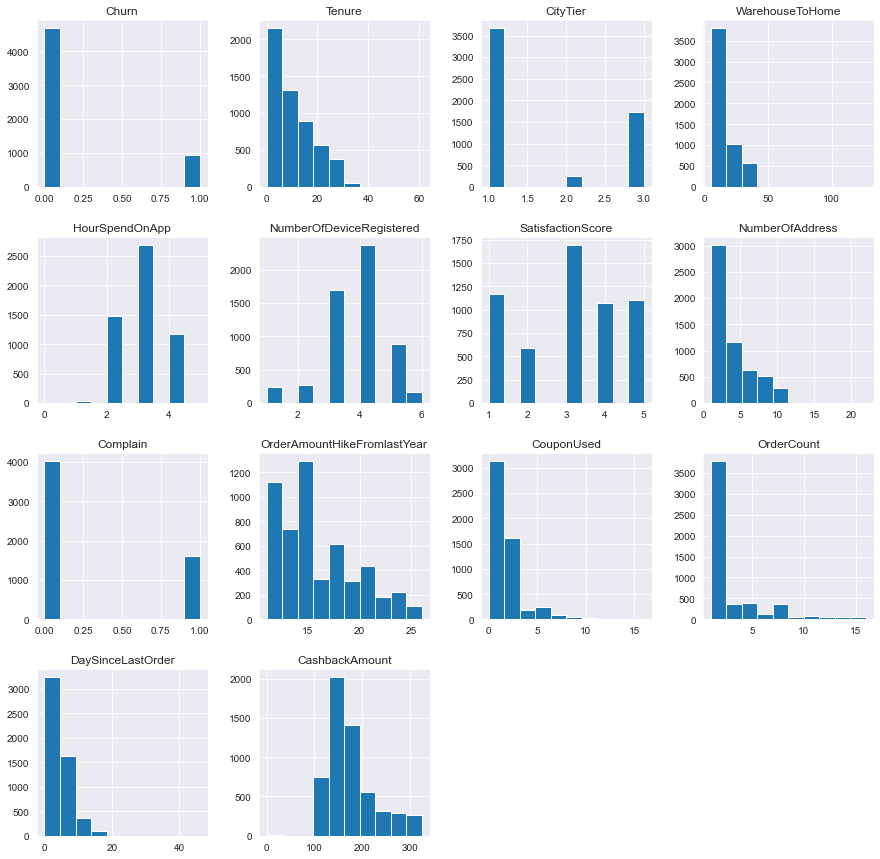

In [313]:
df.hist(bins=10,figsize=(15,15));

'''Data kuantitatif memiliki distribusi data tidak normal, 
sehingga kita akan menggunakan ukuran data median sebelum melakukan EDA.'''

In [314]:
df.describe(include=object)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [315]:
# check more info in each features

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, len(df), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
    df[col].nunique(), list(df[col].drop_duplicates().sample(2, replace=True).values)])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)
    
df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,Churn,int64,5630,0,0.00,2,"[0, 1]"
1,CityTier,int64,5630,0,0.00,3,"[3, 2]"
2,Complain,int64,5630,0,0.00,2,"[0, 1]"
3,NumberOfAddress,int64,5630,0,0.00,15,"[20, 21]"
4,SatisfactionScore,int64,5630,0,0.00,5,"[5, 1]"
5,NumberOfDeviceRegistered,int64,5630,0,0.00,6,"[1, 3]"
6,OrderCount,float64,5630,258,4.58,16,"[14.0, 4.0]"
7,CouponUsed,float64,5630,256,4.55,17,"[11.0, 16.0]"
8,OrderAmountHikeFromlastYear,float64,5630,265,4.71,16,"[16.0, 11.0]"
9,CashbackAmount,float64,5630,0,0.00,2586,"[172.36, 122.88]"


## *2.2 Missing Values*

Dari informasi di bawah terlihat ada beberapa kolom yang memiliki 'missing values'. Selanjutnya kita akan melakukan analisa terhadap missing values dari setiap kolomnya menggunakan function `missingno`.

In [316]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### **Matrix Plot**

Dari matrix terlihat bahwa missing values/data yang hilang pada setiap fitur memiliki pola yang cukup acak.

<AxesSubplot:>

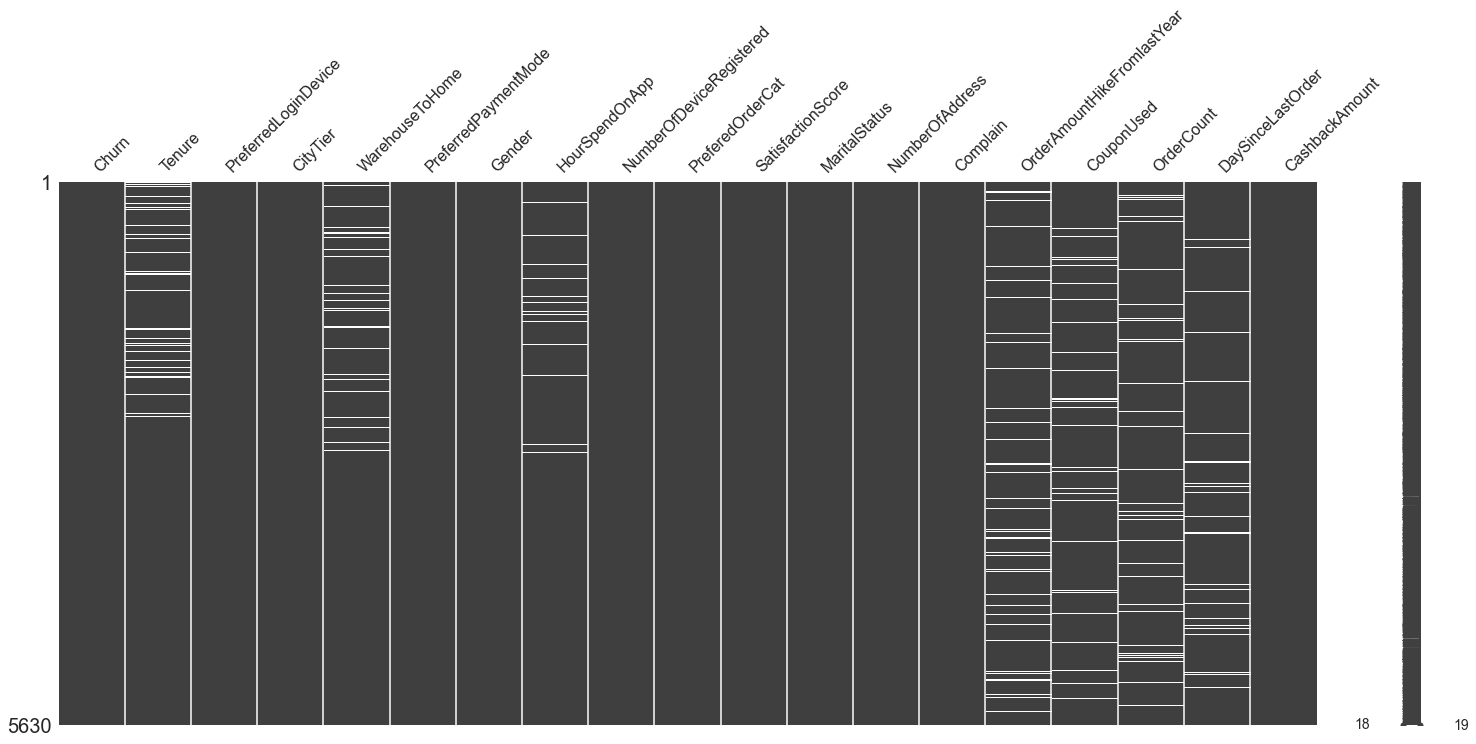

In [317]:
missingno.matrix(df)

### **Heatmap**

Hasil plot Heatmap dibawah menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita. Korelasi nulitas berkisar antara -1 hingga 1.

- -1 : Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada
- 0 : Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain
- 1 : Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

Terlihat dari Heatmap bahwa rata-rata missing values/data yang hilang antara satu fitur dengan fitur yang lainnya tidak berhubungan/berkorelasi, karena hanya memiliki nilai korelasi sebesar -0.1.

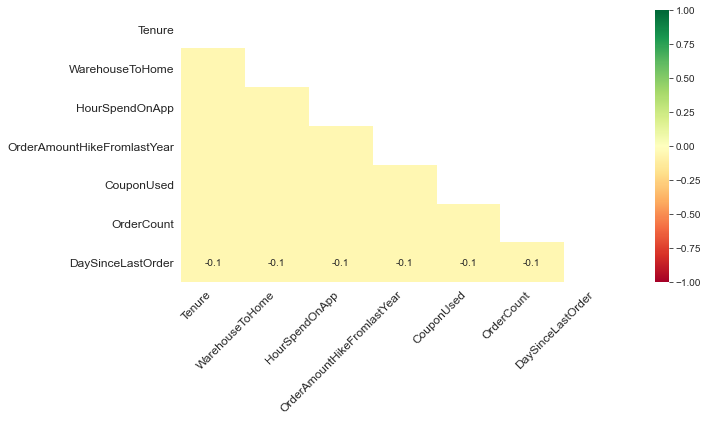

In [318]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

### **Dendogram**

Berdasarkan dendogram dibawah, terlihat bahwa fitur Churn, PreferredLoginDevice, CityTier, PreferredPaymentMode, Gender, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, dan CashbackAmount  berada di titik 0 karena mereka tidak mempunyai missing values/data. Sedangkan untuk fitur CouponUsed, WarehouseToHome, HourSpendOnApp, Tenure, OrderCount, OrderAmountHikeFromLastYear, dan DaySinceLastOrder memiliki missing values/data yang hilang dengan korelasi antar fitur yang tidak signifikan.

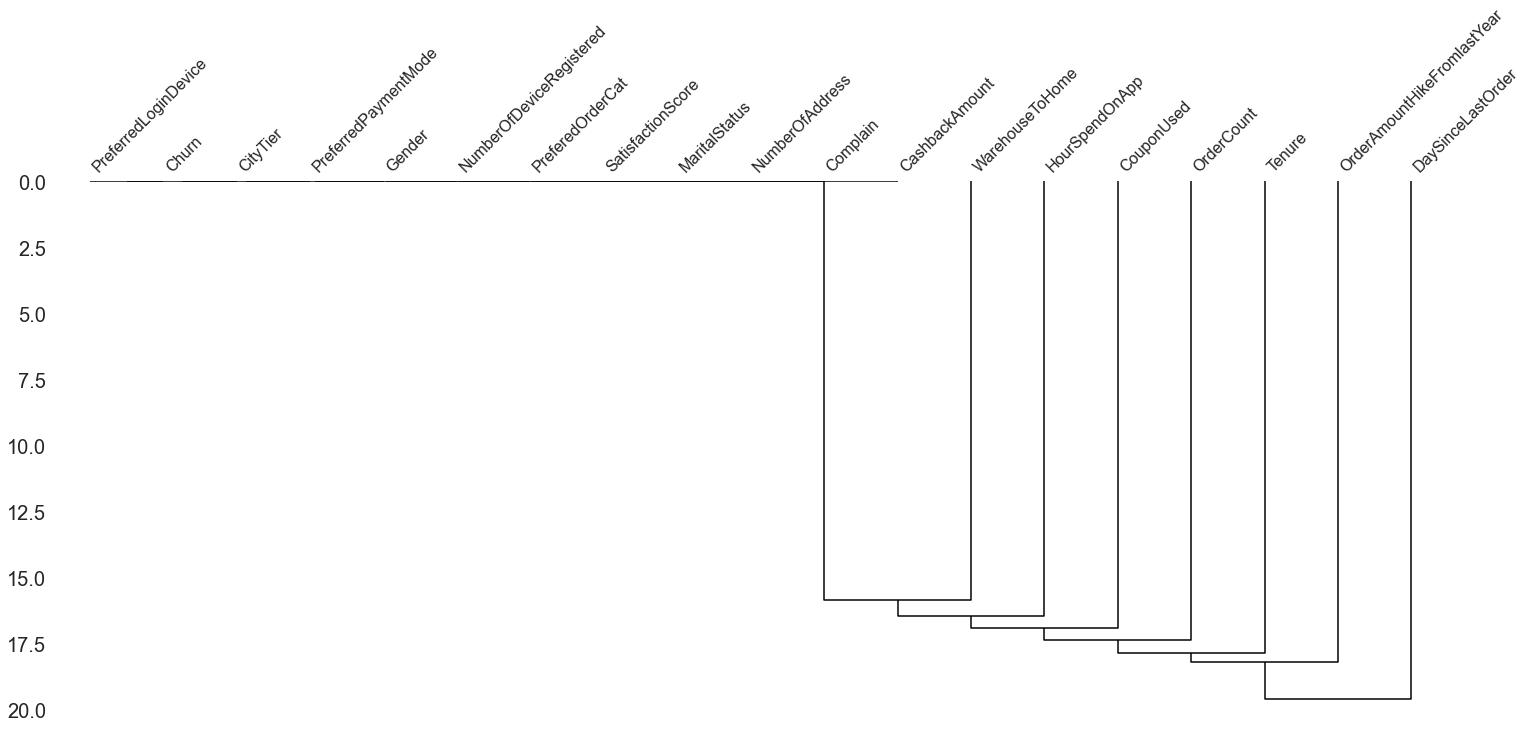

In [319]:
missingno.dendrogram(df)
plt.show()

### Handling missing values

Untuk sementara, kita akan mengisi missing value pada fitur CouponUsed, WarehouseToHome, HourSpendOnApp, Tenure, OrderCount, OrderAmountHikeFromLastYear, dan DaySinceLastOrder dengan menggunakan median dari masing-masing kolom, karena merupakan fitur dengan tipe numerik yang memiliki distribusi tidak normal. Hal ini mempermudah kita untuk melakukan EDA. Namun tindakan yang diambil akan berbeda cara pada saat melakukan data preprocessing.

In [320]:
#mengisi missing values untuk EDA

num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in num_columns:
     df.loc[df[column].isnull(), column] = df[column].median()

df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## *2.3 Inconsistent Data*

Terdapat beberapa fitur dengan kategori yang bermakna sama dengan kategori lain, contohnya: CC dan Credit Card pada kolom `PreferredPaymentMethod`. Oleh karena itu, kita melakukan perubahan pada masing-masing masalah yang sama. 

In [321]:
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 Churn [1 0]
 Tenure [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
 PreferredLoginDevice ['Mobile Phone' 'Phone' 'Computer']
 CityTier [3 1 2]
 WarehouseToHome [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
 PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
 Gender ['Female' 'Male']
 HourSpendOnApp [3. 2. 1. 0. 4. 5.]
 NumberOfDeviceRegistered [3 4 5 2 1 6]
 PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
 SatisfactionScore [2 3 5 4 1]
 MaritalStatus ['Single' 'Divorced' 'Married']
 NumberOfAddress [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
 Complain [1 0]
 OrderAmountHikeFromlastYear [11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21. 25. 26.]
 CouponUsed [ 1.  

In [322]:
#Mengubah PreferredPaymentMode dri CreditCard jadi CC
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Credit Card':'CC'})

#Mengubah PreferredPaymentMode dri Cash On Delivery jadi COD
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Cash on Delivery':'COD'})

#Mengubah PreferedOrderCat Device dri Phone jadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

#Mengubah Login Device dri Phone jadi Mobile Phone
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

In [323]:
# printing unique values of each columns
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

Churn: 
[1 0]

Tenure: 
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice: 
['Mobile Phone' 'Computer']

CityTier: 
[3 1 2]

WarehouseToHome: 
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode: 
['Debit Card' 'UPI' 'CC' 'COD' 'E wallet']

Gender: 
['Female' 'Male']

HourSpendOnApp: 
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered: 
[3 4 5 2 1 6]

PreferedOrderCat: 
['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore: 
[2 3 5 4 1]

MaritalStatus: 
['Single' 'Divorced' 'Married']

NumberOfAddress: 
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain: 
[1 0]

OrderAmountHikeFromlastYear: 
[11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21. 25. 26.]

CouponUsed: 
[ 1.  0.  4.  2.  9.  6. 

## *2.4 Data Analysis*

In [324]:
#pembagian fitur berdasarkan tipe data

num = df.select_dtypes(include=["number"]).columns

cat = df.select_dtypes(include=["object"]).columns

print("Numerical Features:\n", num)
print("\n")
print("Categorical Features:\n", cat)

Numerical Features:
 Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


Categorical Features:
 Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


### Proporsi Customer Churn

Dari hasil grafik di bawah terlihat bahwa 16.84% dari total pelanggan telah melakukan churn. Kondisi pelanggan melakukan tindakan churn pastinya disebabkan oleh beberapa faktor. Selanjutnya kita akan melakukan analisa faktor apa saja yang mempengaruhi para pelanggan dalam melakukan tindakan churn melalui hubungan setiap fitur data terhadap target 'Churn'.

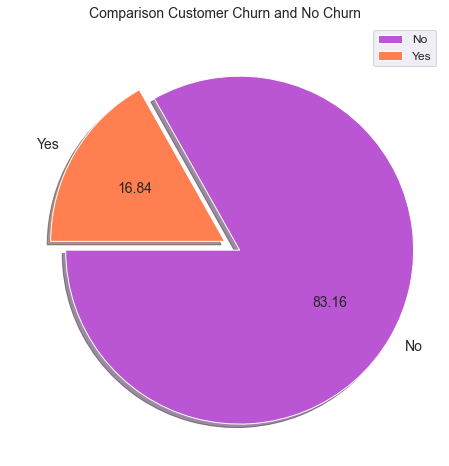

In [325]:
plt.figure(figsize=(10,8))
plt.pie(df["Churn"].value_counts(),autopct='%.2f',explode=[0.1,0],
        labels=["No","Yes"],shadow=True,textprops={'fontsize': 14},
       colors=["mediumorchid","coral"],startangle=180)
plt.title("Comparison Customer Churn and No Churn",fontsize=14)
plt.legend(fontsize=12,loc="upper right")
plt.show()

#### Fitur 'Tenure'

Fitur 'Tenure' menandakan informasi tentang sudah berapa lama para customer tersebut bergabung dalam layanan e-commerce ini. Berdasarkan analisis data visualisasi dibawah, para customer yang baru mulai bergabung atau memiliki periode waktu bergabung yang kurang dari 2 bulan cenderung melakukan *churn* atau berhenti melakukan transaksi di e-commerce ini. Hal ini bisa diakibatkan oleh beberapa kemungkinan antara lain pelanggan baru tersebut hanya mencoba fitur-fitur yang ada pada pelayanan e-commerce tsb atau pelanggan tersebut berhenti setelah mencoba fitur di e-commerce lain yang dirasa lebih menguntungkan. 

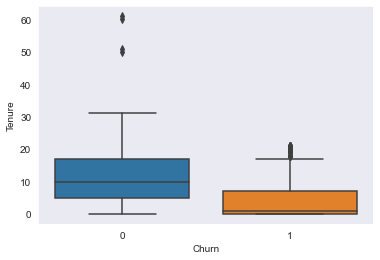

In [326]:
sns.boxplot(x='Churn', y='Tenure', data=df);

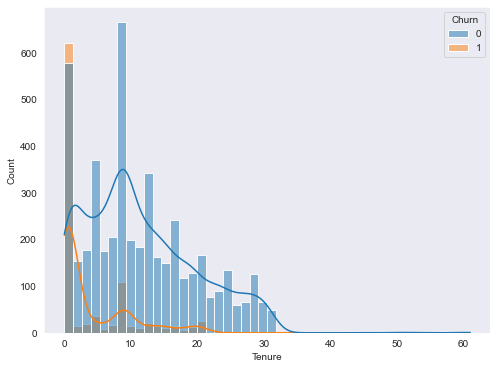

In [327]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Tenure',hue='Churn',kde=True)
plt.show()

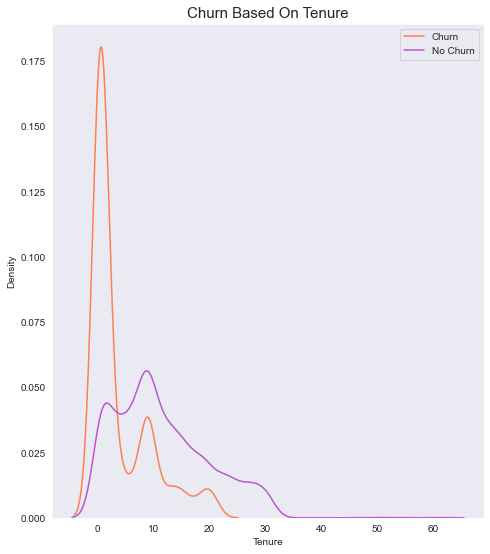

In [328]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['Tenure'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['Tenure'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('Tenure')
plt.title('Churn Based On Tenure', size = 15)
plt.legend();

In [329]:
Churn_Based_Tenure = df.groupby('Tenure')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_Tenure

Churn,0,1
Tenure,,
0.0,0.464567,0.535433
1.0,0.494203,0.505797
2.0,0.916168,0.083832
3.0,0.907692,0.092308
4.0,0.901478,0.098522
5.0,0.921569,0.078431
6.0,0.956284,0.043716
7.0,0.927602,0.072398
8.0,0.939163,0.060837


#### Fitur 'WarehouseToHome'

Fitur 'WarehouseToHome' merupakan fitur yang berisi informasi jarak lokasi customer terhadap lokasi gudang pengiriman. Berdasarkan analisis data visualisasi dibawah, para customer yang berlokasi semakin jauh dari lokasi pengiriman barang cenderung memiliki tingkat *churn* yang lebih tinggi. Hal ini dapat disebabkan karena biaya pengiriman barang yang semakin lebih tinggi jika lokasi customer lebih jauh.

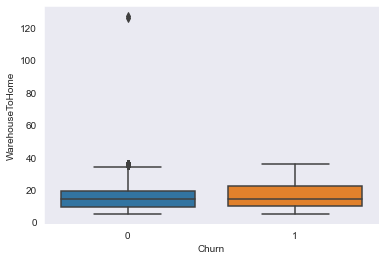

In [330]:
sns.boxplot(x='Churn', y='WarehouseToHome', data=df);

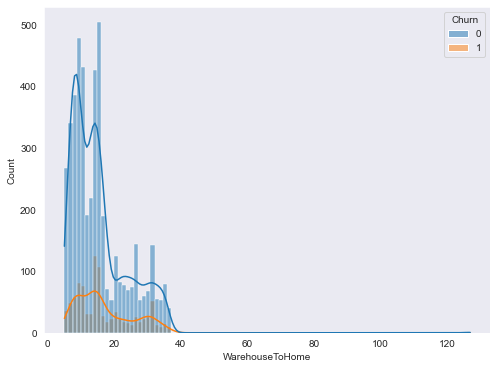

In [331]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='WarehouseToHome',hue='Churn',kde=True)
plt.show()

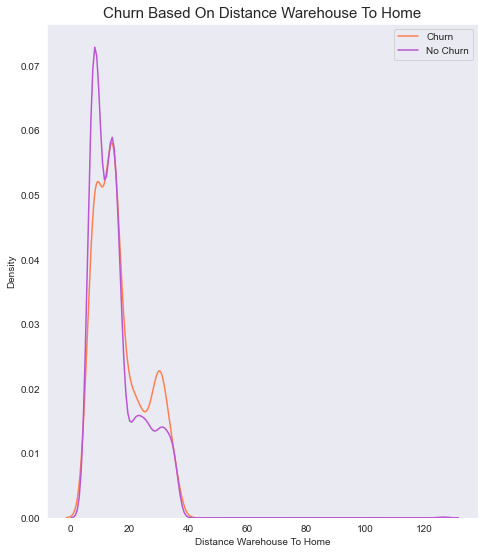

In [332]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['WarehouseToHome'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['WarehouseToHome'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('Distance Warehouse To Home')
plt.title('Churn Based On Distance Warehouse To Home', size = 15)
plt.legend()

In [333]:
CityTier_Based_WarehouseToHome = df.groupby('WarehouseToHome')['Churn'].value_counts(normalize=True).unstack()
CityTier_Based_WarehouseToHome

Churn,0,1
WarehouseToHome,,
5.0,0.875000,0.125000
6.0,0.884746,0.115254
7.0,0.874036,0.125964
8.0,0.869369,0.130631
9.0,0.856887,0.143113
10.0,0.839416,0.160584
11.0,0.862661,0.137339
12.0,0.864253,0.135747
13.0,0.879518,0.120482


#### Fitur 'HourSpendOnApp'

Fitur 'HouSpendOnApp' merupakan fitur yang berisi informasi tentang rata-rata waktu yang dihabiskan oleh para customer dalam menggunakan aplikasi e-commerce per hari nya. Berdasarkan analisis data dibawah, kebanyakan customer menghabiskan rata-rata 3 jam dalam sehari untuk penggunaan aplikasi e-commerce ini.  

<AxesSubplot:xlabel='Churn', ylabel='HourSpendOnApp'>

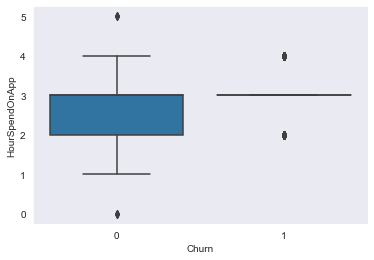

In [334]:
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df)

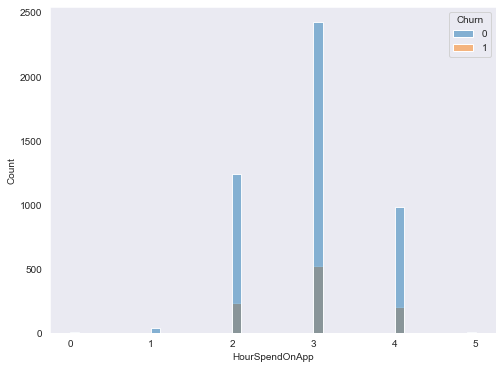

In [335]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='HourSpendOnApp',hue='Churn')
plt.show();

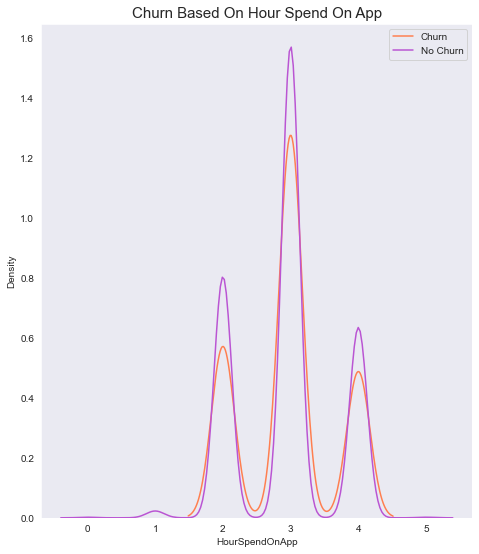

In [336]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['HourSpendOnApp'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['HourSpendOnApp'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('HourSpendOnApp')
plt.title('Churn Based On Hour Spend On App', size = 15)
plt.legend()

In [337]:
Churn_Based_HourSpendOnApp = df.groupby('HourSpendOnApp')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_HourSpendOnApp

Churn,0,1
HourSpendOnApp,,
0.0,1.000000,NaN
1.0,1.000000,NaN
2.0,0.842284,0.157716
3.0,0.823929,0.176071
4.0,0.831633,0.168367
5.0,1.000000,NaN


#### Fitur 'NumberOfDeviceRegistered'

Fitur 'NumberOfDeviceRegistered' berisikan informasi tentang jumlah *device* yang didaftarkan oleh pelanggan ke aplikasi e-commerce. Dari hasil analisis data dibawah, semakin banyak device yang didaftarkan oleh masing-masing pelanggan maka kecenderungan pelanggan tersebut untuk *churn* dari e-commerce ini akan semakin tinggi. Hal ini dapat diakibatkan karena para pelanggan tersebut hanya ingin menikmati promo awal yang biasanya disediakan oleh e-commerce kepada para pelanggan baru.

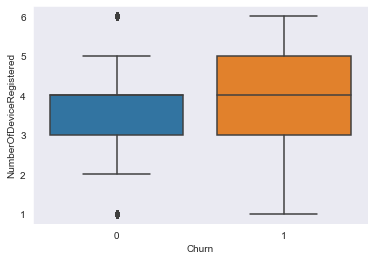

In [338]:
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df);

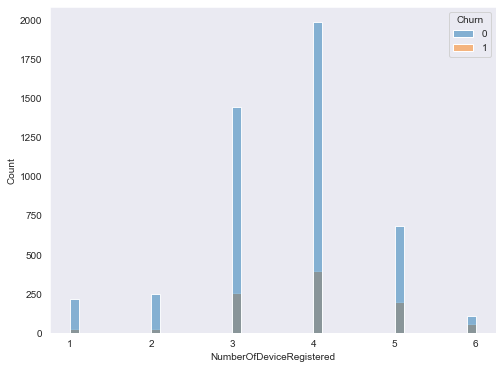

In [339]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='NumberOfDeviceRegistered',hue='Churn')
plt.show();

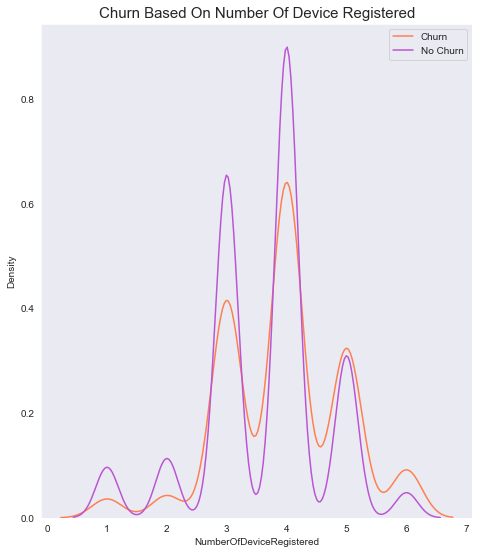

In [340]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['NumberOfDeviceRegistered'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['NumberOfDeviceRegistered'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('NumberOfDeviceRegistered')
plt.title('Churn Based On Number Of Device Registered', size = 15)
plt.legend()

In [341]:
Churn_Based_NumberOfDeviceRegistered = df.groupby('NumberOfDeviceRegistered')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_NumberOfDeviceRegistered

Churn,0,1
NumberOfDeviceRegistered,,
1,0.906383,0.093617
2,0.905797,0.094203
3,0.850500,0.149500
4,0.835086,0.164914
5,0.775255,0.224745
6,0.654321,0.345679


#### Fitur 'NumberOfAddress'

Fitur 'NumberOfAddress' merupakan fitur yang berisi tentang jumlah alamat yang didaftarkan oleh para pelanggan ke aplikasi e-commerce. Dari data fitur tersebut terlihat bahwa para pelanggan memiliki lebih dari 1 alamat yang didaftarkan. Selain itu, semakin banyak jumlah alamat yang  didaftarkan para pelanggan ke aplikasi e-commerce, kecenderungan para pelanggan untuk *churn* juga semakin meningkat. 

<AxesSubplot:xlabel='Churn', ylabel='NumberOfAddress'>

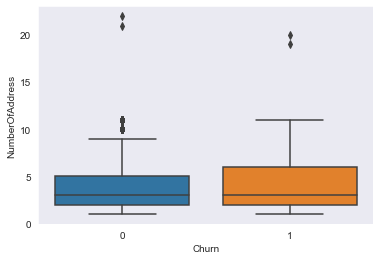

In [342]:
sns.boxplot(x='Churn', y='NumberOfAddress', data=df)

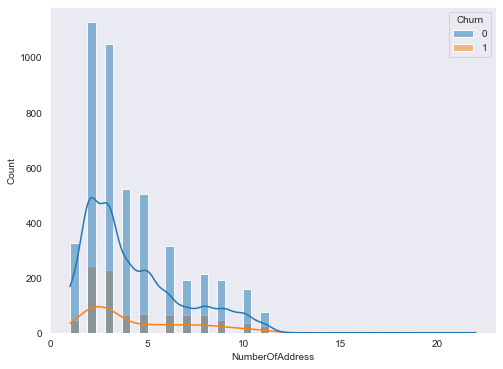

In [343]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='NumberOfAddress',hue='Churn',kde=True)
plt.show();

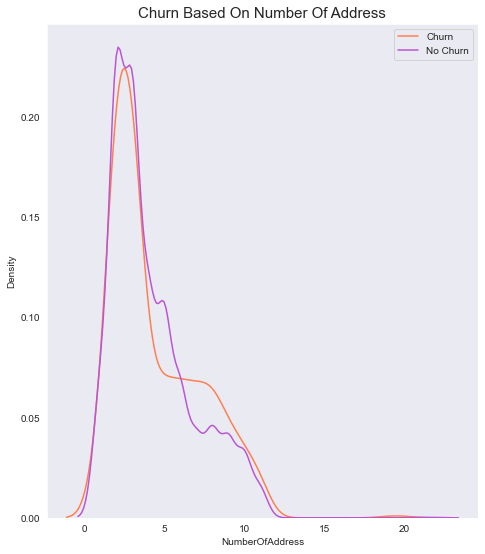

In [344]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['NumberOfAddress'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['NumberOfAddress'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('NumberOfAddress')
plt.title('Churn Based On Number Of Address', size = 15)
plt.legend()

In [345]:
Churn_Based_NumberOfAddress = df.groupby('NumberOfAddress')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_NumberOfAddress

Churn,0,1
NumberOfAddress,,
1,0.878706,0.121294
2,0.823959,0.176041
3,0.821596,0.178404
4,0.889456,0.110544
5,0.882662,0.117338
6,0.827225,0.172775
7,0.750000,0.250000
8,0.764286,0.235714
9,0.807531,0.192469


#### Fitur 'OrderAmountHikeFromlastYear'

Fitur 'OrderAmountHikeFromlastYear' merupakan fitur yang berisi persentase kenaikan jumlah pemesanan oleh para customer terhitung dari tahun lalu. Dan berdasarkan data dibawah, persentase kenaikan jumlah pemesanan tertinggi dari tahun lalu berada di angka 15%.   

<AxesSubplot:xlabel='Churn', ylabel='OrderAmountHikeFromlastYear'>

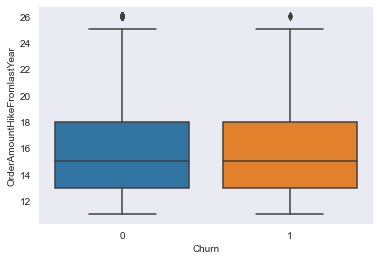

In [346]:
sns.boxplot(x='Churn', y='OrderAmountHikeFromlastYear', data=df)

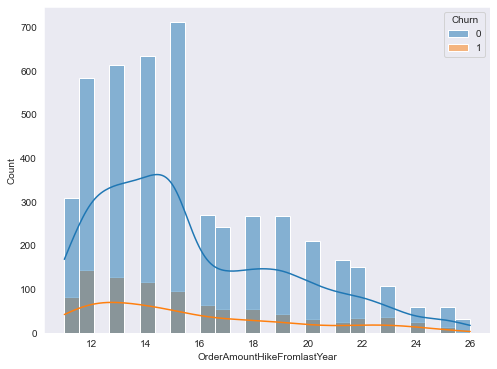

In [347]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='OrderAmountHikeFromlastYear',hue='Churn',kde=True)
plt.show();

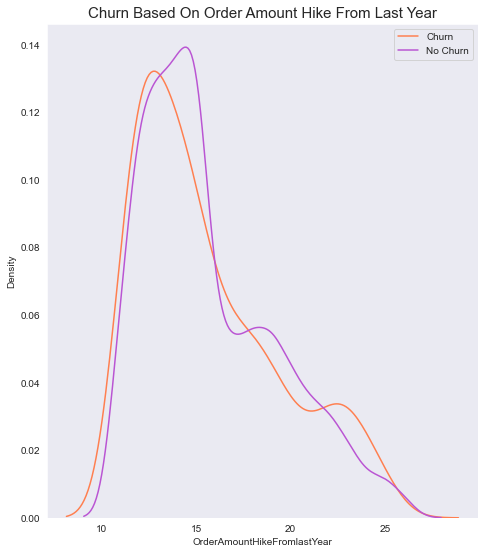

In [348]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['OrderAmountHikeFromlastYear'], color = 'coral',label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['OrderAmountHikeFromlastYear'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('OrderAmountHikeFromlastYear')
plt.title('Churn Based On Order Amount Hike From Last Year', size = 15)
plt.legend()

In [349]:
Churn_Based_OrderAmountHikeFromlastYear = df.groupby('OrderAmountHikeFromlastYear')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_OrderAmountHikeFromlastYear

Churn,0,1
OrderAmountHikeFromlastYear,,
11.0,0.790281,0.209719
12.0,0.802198,0.197802
13.0,0.827260,0.172740
14.0,0.845333,0.154667
15.0,0.881041,0.118959
16.0,0.807808,0.192192
17.0,0.818182,0.181818
18.0,0.831776,0.168224
19.0,0.858521,0.141479


#### Fitur 'CouponUsed'

Fitur 'CouponUsed' berisikan data jumlah kupon yang digunakan oleh para pelanggan pada bulan lalu. Berdasarkan hasil analisis data dibawah terlihat bahwa rata-rata para pelanggan menggunakan kupon pada bulan lalu sebanyak satu kali.

<AxesSubplot:xlabel='Churn', ylabel='CouponUsed'>

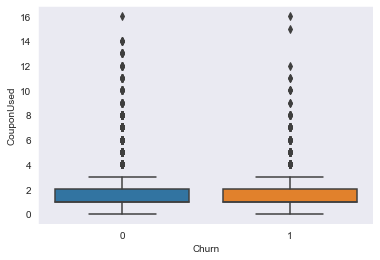

In [350]:
sns.boxplot(x='Churn', y='CouponUsed', data=df)

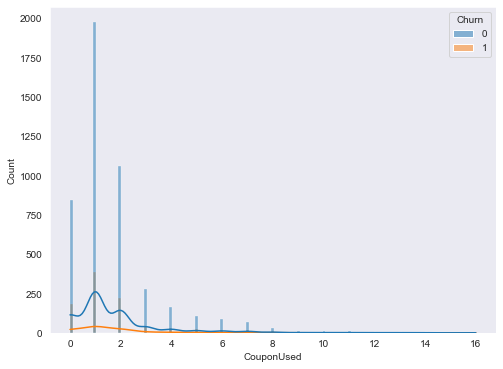

In [351]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='CouponUsed',hue='Churn',kde=True)
plt.show();

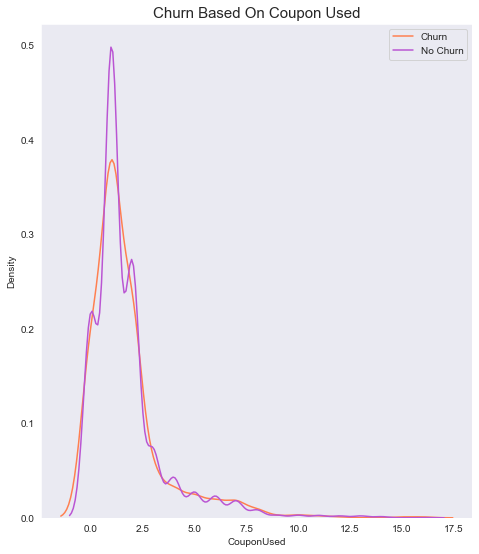

In [352]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['CouponUsed'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['CouponUsed'], color = 'mediumorchid',label = 'No Churn', alpha = 0.5)
plt.xlabel('CouponUsed')
plt.title('Churn Based On Coupon Used', size = 15)
plt.legend()

In [353]:
Churn_Based_CouponUsed = df.groupby('CouponUsed')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_CouponUsed

Churn,0,1
CouponUsed,,
0.0,0.819417,0.180583
1.0,0.836510,0.163490
2.0,0.826968,0.173032
3.0,0.859327,0.140673
4.0,0.847716,0.152284
5.0,0.821705,0.178295
6.0,0.833333,0.166667
7.0,0.797753,0.202247
8.0,0.785714,0.214286


#### Fitur 'OrderCount'

Fitur 'OrderCount' berisikan data jumlah pemesanan oleh para pelanggan di aplikasi e-commerce pada bulan lalu. Terlihat bahwa rata-rata jumlah pembelanjaan yang dilakukan oleh para pelanggan pada bulan lalu sebanyak 2 kali. 

<AxesSubplot:xlabel='Churn', ylabel='OrderCount'>

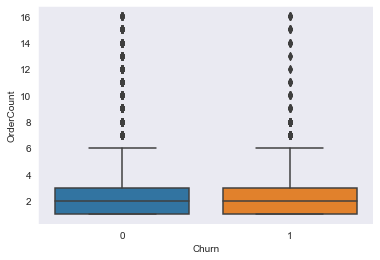

In [354]:
sns.boxplot(x='Churn', y='OrderCount', data=df)

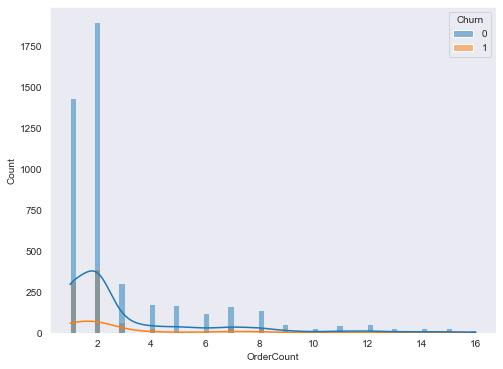

In [355]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='OrderCount',hue='Churn',kde=True)
plt.show();

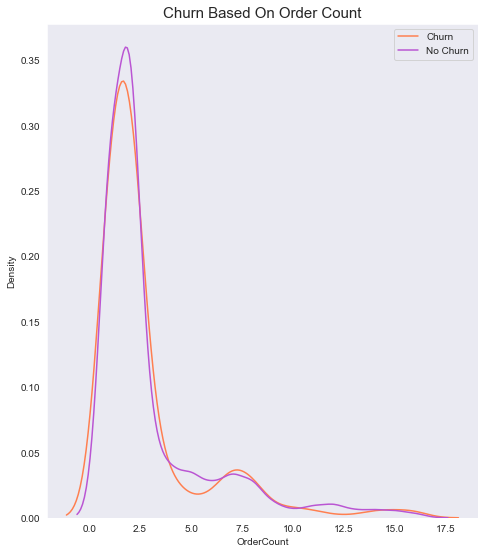

In [356]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['OrderCount'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['OrderCount'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('OrderCount')
plt.title('Churn Based On Order Count', size = 15)
plt.legend()

In [357]:
Churn_Based_OrderCount = df.groupby('OrderCount')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_OrderCount

Churn,0,1
OrderCount,,
1.0,0.819532,0.180468
2.0,0.830048,0.169952
3.0,0.816712,0.183288
4.0,0.862745,0.137255
5.0,0.922652,0.077348
6.0,0.883212,0.116788
7.0,0.796117,0.203883
8.0,0.813953,0.186047
9.0,0.870968,0.129032


#### Fitur 'DaySinceLastOrder'

Fitur 'DaySinceLastOrder' merupakan fitur yang berisikan tentang informasi berapa hari sejak pemesanan terakhir yang dilakukan oleh para customer. Dari hasil analisis data dibawah terlihat bahwa baru sekitar 0-3 hari sejak pemesanan terakhir, banyak customer yang melakukan *churn*. Hal ini bisa diasumsikan bahwa para pelanggan merasa tidak puas dengan pemesanan terakhirnya.

<AxesSubplot:xlabel='Churn', ylabel='DaySinceLastOrder'>

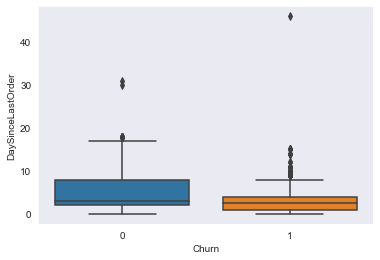

In [358]:
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)

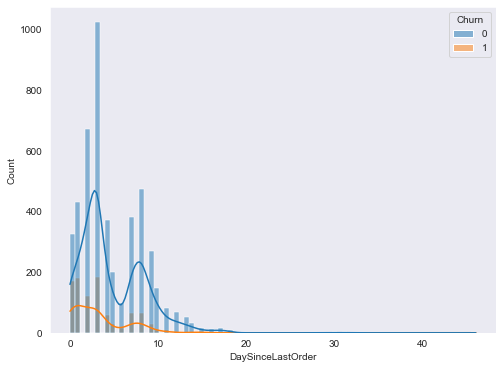

In [359]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='DaySinceLastOrder',hue='Churn',kde=True)
plt.show();

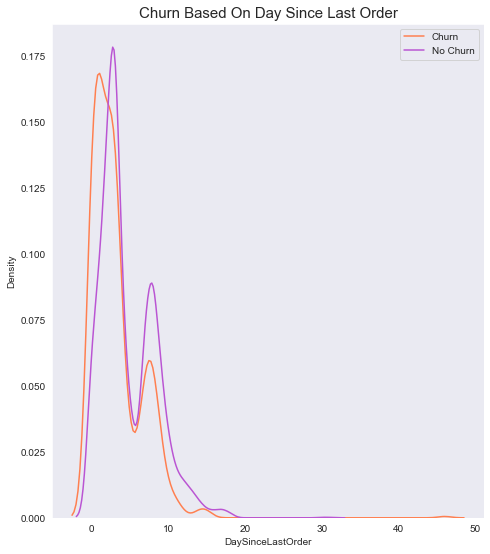

In [360]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['DaySinceLastOrder'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['DaySinceLastOrder'], color = 'mediumorchid', label = 'No Churn', alpha = 0.5)
plt.xlabel('DaySinceLastOrder')
plt.title('Churn Based On Day Since Last Order', size = 15)
plt.legend()

In [361]:
Churn_Based_DaySinceLastOrder = df.groupby('DaySinceLastOrder')['Churn'].value_counts(normalize=True).unstack()
Churn_Based_DaySinceLastOrder

Churn,0,1
DaySinceLastOrder,,
0.0,0.657258,0.342742
1.0,0.703583,0.296417
2.0,0.845960,0.154040
3.0,0.847556,0.152444
4.0,0.865429,0.134571
5.0,0.877193,0.122807
6.0,0.858407,0.141593
7.0,0.854586,0.145414
8.0,0.877323,0.122677


#### Fitur 'CashbackAmount'

Fitur 'CashbackAmount' merupakan fitur yang berisikan tentang jumlah *cashback* yang didapatkan oleh para customer pada bulan lalu. Dari hasil grafik dibawah terlihat bahwa semakin sedikit *cashback* yang didapatkan oleh para pelanggan, maka pelanggan-pelanggan tersebut cenderung melakukan tindakan *churn*.

<AxesSubplot:xlabel='Churn', ylabel='CashbackAmount'>

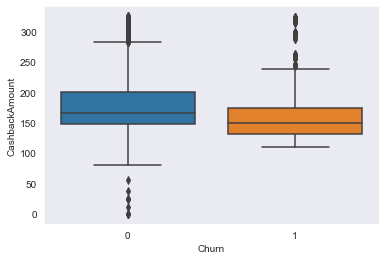

In [362]:
sns.boxplot(x='Churn', y='CashbackAmount', data=df)

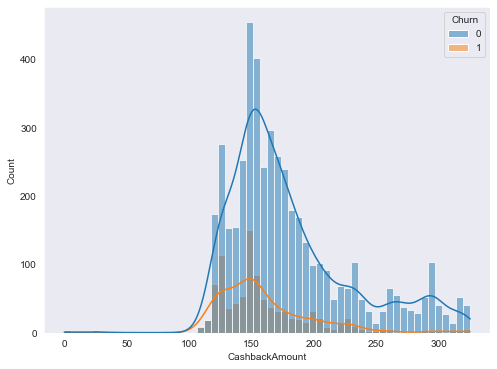

In [363]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='CashbackAmount',hue='Churn',kde=True)
plt.show();

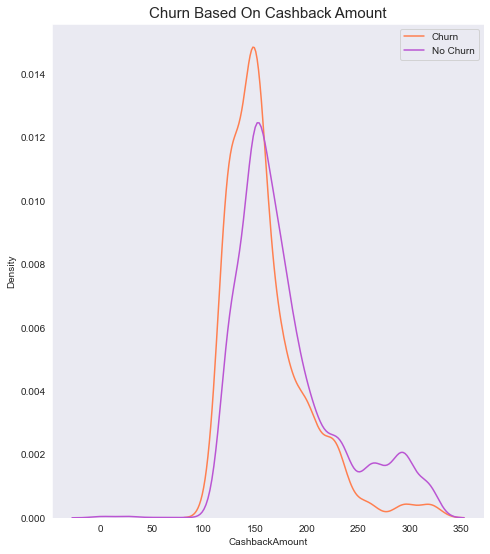

In [364]:
fig = plt.figure(figsize = (17, 20))

plt.subplot(221)
sns.set_style("dark")
sns.kdeplot(df.query('Churn == 1')['CashbackAmount'], color = 'coral', label = 'Churn', alpha = 0.5)
sns.kdeplot(df.query('Churn == 0')['CashbackAmount'], color = 'mediumorchid',label = 'No Churn', alpha = 0.5)
plt.xlabel('CashbackAmount')
plt.title('Churn Based On Cashback Amount', size = 15)
plt.legend()

#### Fitur 'CityTier'

Fitur 'CityTier' ini berisi informasi persebaran customer berdasarkan tingkat kemajuan kota dari masing-masing lokasi tempat tinggal customer. Tier 1 menandakan kota yang paling maju dengan tingkat perekonomian yang tinggi, sedangkan Tier 2 menandakan kota yang masih berkembang dengan tingkat perekonomian yangs sedang, dan Tier 3 merupakan kota berkembang dengan tingkat perekonomian yang paling rendah.

Berdasarkan analisis data visualisasi dibawah, para customer yang berlokasi di kota Tier 2 dan 3 atau kota yang masih berkembang memiliki tingkat churn yang lebih tinggi dibandingkan pada kota Tier 1. Hal ini dikarenakan kota Tier 1 lebih maju dibandingkan tingkat kota yang lain sehingga perekonomiannya lebih stabil. Sedangkan pada kota yang masih berkembang dengan tingkat ekonomi penduduk yang lebih rendah bisa jadi kendala para customer dalam berlangganan layanan pada e-commerce ini. Selain itu infrastruktur pelayanan e-commerce kemungkinan besar juga belum maksimal dalam menjangkau kondisi di wilayah Tier 2 dan Tier 3. Sehingga kita perlu meningkatkan penjangkauan pelayanan di wilayah Tier 2 dan Tier 3 guna meningkatkan profit dari para pelanggan di wilayah tersebut.

In [365]:
import plotly.express as px

In [366]:
ch = {1: 'Churn', 0: 'No Churn'}
df['Churn'] = df['Churn'].map(ch)

In [367]:
tier = df.groupby(['CityTier', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
tier.iloc[[0,1],0] = 'Tier 1'
tier.iloc[[2,3],0] = 'Tier 2'
tier.iloc[[4,5],0] = 'Tier 3'
tier

,CityTier,Churn,count
0,Tier 1,Churn,532
1,Tier 1,No Churn,3134
2,Tier 2,Churn,48
3,Tier 2,No Churn,194
4,Tier 3,Churn,368
5,Tier 3,No Churn,1354


In [368]:
fig = px.sunburst(tier, path = ['CityTier', 'Churn'], values = 'count', title = 'Churn Based On City Tier',
                 width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [369]:
#uji hipotesis dengan chi square test
citytier_chi_test = pd.crosstab(df['CityTier'],df['Churn'])

Ho = "City Tier tidak berkorelasi dengan Churn"
H1 = "City Tier berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(citytier_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 1.2612000812079913e-09 , artinya City Tier berkorelasi dengan Churn


#### Fitur 'SatisfactionScore'

Fitur 'SatisfactionScore' merupakan fitur yang berisi tentang skor kepuasan yang diberikan oleh para pelanggan terhadap aplikasi e-commerce yang telah mereka gunakan. Berdasarkan hasil analisis data dibawah, skor kepuasan yang paling banyak diberikan oleh para pelanggan adalah skor 3, disusul dengan skor 1, 5, 4, dan terakhir 2. Hal ini menunjukkan bahwa para pelanggan masih belum cukup puas dengan pelayanan yang diberikan oleh pihak e-commerce. Sehingga beberapa diantara pelanggan tersebut melakukan pemberhentian layanan atau churn. Namun, pelanggan yang memberi skor terbaik yaitu 5 cenderung melakukan tindakan *churn*.

In [370]:
score = df.groupby(['SatisfactionScore', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
score.iloc[[0,1],0] = 'Score 1'
score.iloc[[2,3],0] = 'Score 2'
score.iloc[[4,5],0] = 'Score 3'
score.iloc[[6,7],0] = 'Score 4'
score.iloc[[8,9],0] = 'Score 5'
score

,SatisfactionScore,Churn,count
0,Score 1,Churn,134
1,Score 1,No Churn,1030
2,Score 2,Churn,74
3,Score 2,No Churn,512
4,Score 3,Churn,292
5,Score 3,No Churn,1406
6,Score 4,Churn,184
7,Score 4,No Churn,890
8,Score 5,Churn,264
9,Score 5,No Churn,844


In [371]:
fig = px.sunburst(score, path = ['SatisfactionScore', 'Churn'], values = 'count', title = 'Churn Based On Satisfaction Score',
                 width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [372]:
#uji hipotesis dengan chi square test
SatisfactionScore_chi_test = pd.crosstab(df['SatisfactionScore'],df['Churn'])

Ho = "Satisfaction Score tidak berkorelasi dengan Churn"
H1 = "Satisfaction Score berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(SatisfactionScore_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 2.4233349782737515e-14 , artinya Satisfaction Score berkorelasi dengan Churn


#### Fitur 'Complain'

Fitur 'Complain' berisikan informasi tentang jumlah komplain yang diberikan oleh para pelanggan ke aplikasi e-commerce. Sebanyak 28% pelanggan telah melakukan komplain terhadap pelayanan e-commerce dan 32% dari pelanggan yang melakukan komplain tersebut telah melakukan tindakan *churn*.

In [373]:
compl = {1: 'Complain', 0: 'No Complain'}
df['Complain'] = df['Complain'].map(compl)

In [374]:
complain = df.groupby(['Complain', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
complain.iloc[[0,1],0] = 'Complain'
complain.iloc[[2,3],0] = 'No Complain'
complain

,Complain,Churn,count
0,Complain,Churn,508
1,Complain,No Churn,1096
2,No Complain,Churn,440
3,No Complain,No Churn,3586


In [375]:
fig = px.sunburst(complain, path = ['Complain', 'Churn'], values = 'count', title = 'Churn Based On Complain Customer',
                 width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [376]:
#uji hipotesis dengan chi square test
Complain_chi_test = pd.crosstab(df['Complain'],df['Churn'])

Ho = "Complain tidak berkorelasi dengan Churn"
H1 = "Complain berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(Complain_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 2.6644609654640615e-78 , artinya Complain berkorelasi dengan Churn


#### Fitur 'PreferredLoginDevice'

Fitur 'PreferredLoginDevice' merupakan fitur yang berisi informasi tentang jenis device yang digunakan oleh para pelanggan untuk login ke aplikasi e-commerce. Berdasarkan hasil uji chi square test dibawah, fitur 'PreferredLoginDevice' ini memiliki korelasi terhadap churn. Mayoritas pelanggan melakukan login ke aplikasi e-commerce melalui perangkat mobile phone. Namun, perangkat komputer memiliki porsi terbanyak untuk pelanggan melakukan tindakan *churn*.

In [377]:
login = df.groupby(['PreferredLoginDevice', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
login.iloc[[0,1],0] = 'Mobile Phone'
login.iloc[[2,3],0] = 'Computer'
login

,PreferredLoginDevice,Churn,count
0,Mobile Phone,Churn,324
1,Mobile Phone,No Churn,1310
2,Computer,Churn,624
3,Computer,No Churn,3372


In [378]:
fig = px.sunburst(login, path = ['PreferredLoginDevice', 'Churn'], values = 'count', 
                  title = 'Churn Based On Prefered Login Device', width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [379]:
#uji hipotesis dengan chi square test
PreferredLoginDevice_chi_test = pd.crosstab(df['PreferredLoginDevice'],df['Churn'])

Ho = "PreferredLoginDevice tidak berkorelasi dengan Churn"
H1 = "PreferredLoginDevice berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(PreferredLoginDevice_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 0.0001477040239947965 , artinya PreferredLoginDevice berkorelasi dengan Churn


#### Fitur 'PreferredPaymentMode'

Fitur 'PreferredPaymentMode' merupakan fitur yang berisikan tentang metode pembayaran yang dilakukan oleh para pelanggan di setiap transaksinya. Berdasarkan analisis diatas, mayoritas pelanggan melakukan pembayaran menggunakan debit card. Namun, pelanggan yang bertransaksi COD melakukan churn tertinggi terhadap pelayanan e-commerce, yaitu sebesar 25% dari total pelanggan yang bertransaksi COD. Dari hasil chi square test juga menunjukkan bahwa fitur mode pembayaran ini berkorelasi terhadap churn.

In [380]:
payment = df.groupby(['PreferredPaymentMode', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
payment.iloc[[0,1],0] = 'CC'
payment.iloc[[2,3],0] = 'COD'
payment.iloc[[4,5],0] = 'Debit Card'
payment.iloc[[6,7],0] = 'E Wallet'
payment.iloc[[8,9],0] = 'UPI'
payment

,PreferredPaymentMode,Churn,count
0,CC,Churn,252
1,CC,No Churn,1522
2,COD,Churn,128
3,COD,No Churn,386
4,Debit Card,Churn,356
5,Debit Card,No Churn,1958
6,E Wallet,Churn,140
7,E Wallet,No Churn,474
8,UPI,Churn,72
9,UPI,No Churn,342


In [381]:
fig = px.sunburst(payment, path = ['PreferredPaymentMode', 'Churn'], values = 'count', 
                  title = 'Churn Based On Prefered Payment Mode', width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [382]:
#uji hipotesis dengan chi square test
PreferedPaymentMode_chi_test = pd.crosstab(df['PreferredPaymentMode'],df['Churn'])

Ho = "PreferedPaymentMode tidak berkorelasi dengan Churn"
H1 = "PreferedPaymentMode berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(PreferedPaymentMode_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 1.4978570960706217e-10 , artinya PreferedPaymentMode berkorelasi dengan Churn


#### Fitur 'Gender'

Dari hasil uji chi square test, perbedaan gender berpengaruh terhadap aktivitas churn. Berdasarkan grafik fitur 'Gender' dibawah terlihat bahwa mayoritas pelanggan yang bertransaksi di e-commerce ini berjenis kelamin laki-laki. Selain itu, sebanyak 18% yang merupakan pelanggan laki-laki telah melakukan *churn* lebih banyak dibandingkan dengan pelanggan perempuan.

In [383]:
gender = df.groupby(['Gender', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
gender.iloc[[0,1],0] = 'Female'
gender.iloc[[2,3],0] = 'Male'
gender

,Gender,Churn,count
0,Female,Churn,348
1,Female,No Churn,1898
2,Male,Churn,600
3,Male,No Churn,2784


In [384]:
fig = px.sunburst(gender, path = ['Gender', 'Churn'], values = 'count', 
                  title = 'Churn Based On Gender', width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [385]:
#uji hipotesis dengan chi square test
Gender_chi_test = pd.crosstab(df['Gender'],df['Churn'])

Ho = "Gender tidak berkorelasi dengan Churn"
H1 = "Gender berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(Gender_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 0.030820940334890086 , artinya Gender berkorelasi dengan Churn


#### Fitur 'PreferedOrderCat'

Fitur 'PreferedOrderCat' berisikan tentang informasi kategori produk yang suka dipesan oleh para pelanggan. Dari hasil analisis data dibawah, fitur ini berpengaruh terhadap aktivitas churn dan kategori laptop & aksesoris nya menjadi kategori produk yang lebih sering dipesan oleh para pelanggan. Hal ini bisa dikaitkan karena mayoritas pelanggan adalah laki-laki. Sedangkan, untuk pelanggan yang melakukan *churn* kebanyakan adalah pelanggan yang membeli produk mobile phone.

In [386]:
ordercat = df.groupby(['PreferedOrderCat', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
ordercat.iloc[[0,1],0] = 'Fashion'
ordercat.iloc[[2,3],0] = 'Grocery'
ordercat.iloc[[4,5],0] = 'Laptop & Accessory'
ordercat.iloc[[6,7],0] = 'Mobile Phone'
ordercat.iloc[[8,9],0] = 'Others'
ordercat

,PreferedOrderCat,Churn,count
0,Fashion,Churn,128
1,Fashion,No Churn,698
2,Grocery,Churn,20
3,Grocery,No Churn,390
4,Laptop & Accessory,Churn,210
5,Laptop & Accessory,No Churn,1840
6,Mobile Phone,Churn,570
7,Mobile Phone,No Churn,1510
8,Others,Churn,20
9,Others,No Churn,244


In [387]:
fig = px.sunburst(ordercat, path = ['PreferedOrderCat', 'Churn'], values = 'count', 
                  title = 'Churn Based On Prefered Order Category', width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [388]:
#uji hipotesis dengan chi square test
PreferedOrderCat_chi_test = pd.crosstab(df['PreferedOrderCat'],df['Churn'])

Ho = "PreferedOrderCat tidak berkorelasi dengan Churn"
H1 = "PreferedOrderCat berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(PreferedOrderCat_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 3.119243404287749e-61 , artinya PreferedOrderCat berkorelasi dengan Churn


#### Fitur 'MaritalStatus'

Fitur status pernikahan memiliki korelasi terhadap churn. Berdasarkan grafik dibawah terlihat bahwa mayoritas pelanggan di e-commerce ini telah berstatus menikah. Namun, kebanyakan pelanggan yang melakukan *churn* merupakan pelanggan yang berstatus lajang.

In [389]:
marital = df.groupby(['MaritalStatus', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
marital.iloc[[0,1],0] = 'Divorce'
marital.iloc[[2,3],0] = 'Married'
marital.iloc[[4,5],0] = 'Single'
marital

,MaritalStatus,Churn,count
0,Divorce,Churn,124
1,Divorce,No Churn,724
2,Married,Churn,344
3,Married,No Churn,2642
4,Single,Churn,480
5,Single,No Churn,1316


In [390]:
fig = px.sunburst(marital, path = ['MaritalStatus', 'Churn'], values = 'count', 
                  title = 'Churn Based On Marital Status', width = 600, height = 600)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [391]:
#uji hipotesis dengan chi square test
Maritalstatus_chi_test = pd.crosstab(df['MaritalStatus'],df['Churn'])

Ho = "Marital Status tidak berkorelasi dengan Churn"
H1 = "Marital Status berkorelasi dengan Churn"

stats, pval, dof, expected = chi2_contingency(Maritalstatus_chi_test)

if pval<=0.05:
    print("Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = {}".format(pval), ", artinya", H1)
else:
    print("Terima Ho, karena p value lebih dari 0.05, nilai p value = {}".format(pval), " artinya", Ho)

Tolak Ho, karena p value kurang dari sama dengan 0.05, nilai p value = 1.073011277910542e-41 , artinya Marital Status berkorelasi dengan Churn


# **3. DATA PREPROCESSING**

*Data preprocessing* akan membantu kita dalam menangani *missing values* dengan *imputer* dan mengolah jenis data dengan *encoding dan scaling*.

Pertama kita mengulang proses loading data yang awal dan menangani data yang tidak konsisten. 
Setelah itu, kita harus memisahkan data menjadi 2 kelompok data yaitu: Train Set dan Test Set.

In [392]:
# reload original data

df_copy = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df_copy.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [393]:
# drop CustomerID column

df_copy.drop('CustomerID', axis = 1, inplace = True)

In [394]:
# re-handle inconsistent data

df_copy['PreferredPaymentMode'] = df_copy['PreferredPaymentMode'].replace({'Credit Card':'CC'})
df_copy['PreferredPaymentMode'] = df_copy['PreferredPaymentMode'].replace({'Cash on Delivery':'COD'})
df_copy['PreferedOrderCat'] = df_copy['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})
df_copy['PreferredLoginDevice'] = df_copy['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

In [395]:
# train test split

df_train, df_test = train_test_split(
    df_copy, test_size = 0.3, random_state = 88, 
    stratify = df_copy['Churn']
)

In [396]:
# check data distribution of target feature

print(df_train['Churn'].value_counts(normalize=True))
print('========')
print(df_test['Churn'].value_counts(normalize = True))

0    0.831515
1    0.168485
Name: Churn, dtype: float64
0    0.831853
1    0.168147
Name: Churn, dtype: float64


## *3.1 Data Split Summary*

Jumlah data pada kolom Churn mengidentifikasi adanya ketidakseimbangan data pada kelas positif. Artinya, jika masalah ini tidak ditindaklanjuti maka hasil prediksi pada model kita akan menghasilkan hasil yang kurang optimal. Oleh karena itu, masalah ini bisa dihindari dengan melakukan teknik *resampling*. Teknik yang bisa kita lakukan adalah bisa melalui `class weight` atau memilih boosting models. 

## *3.2 Missing Values*

Bisa kita lihat dari tabel dibawah bahwa kita memiliki missing values pada 7 fitur yaitu `WarehouseToHome`, `HourSpendOnApp`, `DaySinceLastOrder`, `Tenure`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`. Untuk mengatasi *missing values* pada fitur numerik, akan lebih baik untuk menggunakan dengan teknik `IterativeImputer`. Metode ini memanfaatkan fitur lain untuk memprediksi missing value menggunakan regresi secara iteratif. 

Namun, untuk mengantisipasi adanya missing values di fitur lain pada data baru (*unseen data*) yang belum pernah kita olah/amati, alangkah baiknya jika kita melakukan imputer pada semua fitur. 

Untuk fitur kategori, kita akan menggunakan teknik simple imputer juga dengan strategy `constant` dengan mengisi nan value dengan `Missing`.

In [397]:
# check more info in each features

list_item = []
for col in df_train.columns:
    list_item.append([col, df_train[col].dtype, 
    len(df_train), df_train[col].isna().sum(), round((df_train[col].isna().sum()/len(df_train[col]))*100,2),
    df_train[col].nunique(), list(df_train[col].drop_duplicates().sample(2, replace=True).values)])

items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)
    
items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,Churn,int64,3941,0,0.00,2,"[0, 0]"
1,CityTier,int64,3941,0,0.00,3,"[3, 3]"
2,Complain,int64,3941,0,0.00,2,"[1, 1]"
3,NumberOfAddress,int64,3941,0,0.00,13,"[7, 2]"
4,SatisfactionScore,int64,3941,0,0.00,5,"[1, 4]"
5,NumberOfDeviceRegistered,int64,3941,0,0.00,6,"[1, 2]"
6,OrderCount,float64,3941,180,4.57,16,"[15.0, 8.0]"
7,CouponUsed,float64,3941,200,5.07,17,"[9.0, 15.0]"
8,OrderAmountHikeFromlastYear,float64,3941,193,4.90,16,"[15.0, 17.0]"
9,CashbackAmount,float64,3941,0,0.00,2338,"[166.44, 155.69]"


## *3.3 Encoding*

Berdasarkan visualisasi pada data kategorik dibawah, kita akan melakukan teknik encoding untuk mengubah jenis data mereka menjadi data numerik agar bisa diproses oleh model yang akan kita gunakan nanti.

Yang akan kita lakukan adalah menentukan variabel mana saja yang akan menggunakan jenis encoder tertentu. 

ONEHOT ENCODING  
   - `MaritalStatus`, `Gender`: fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.  
   - `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferedOrderCat`: fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit .


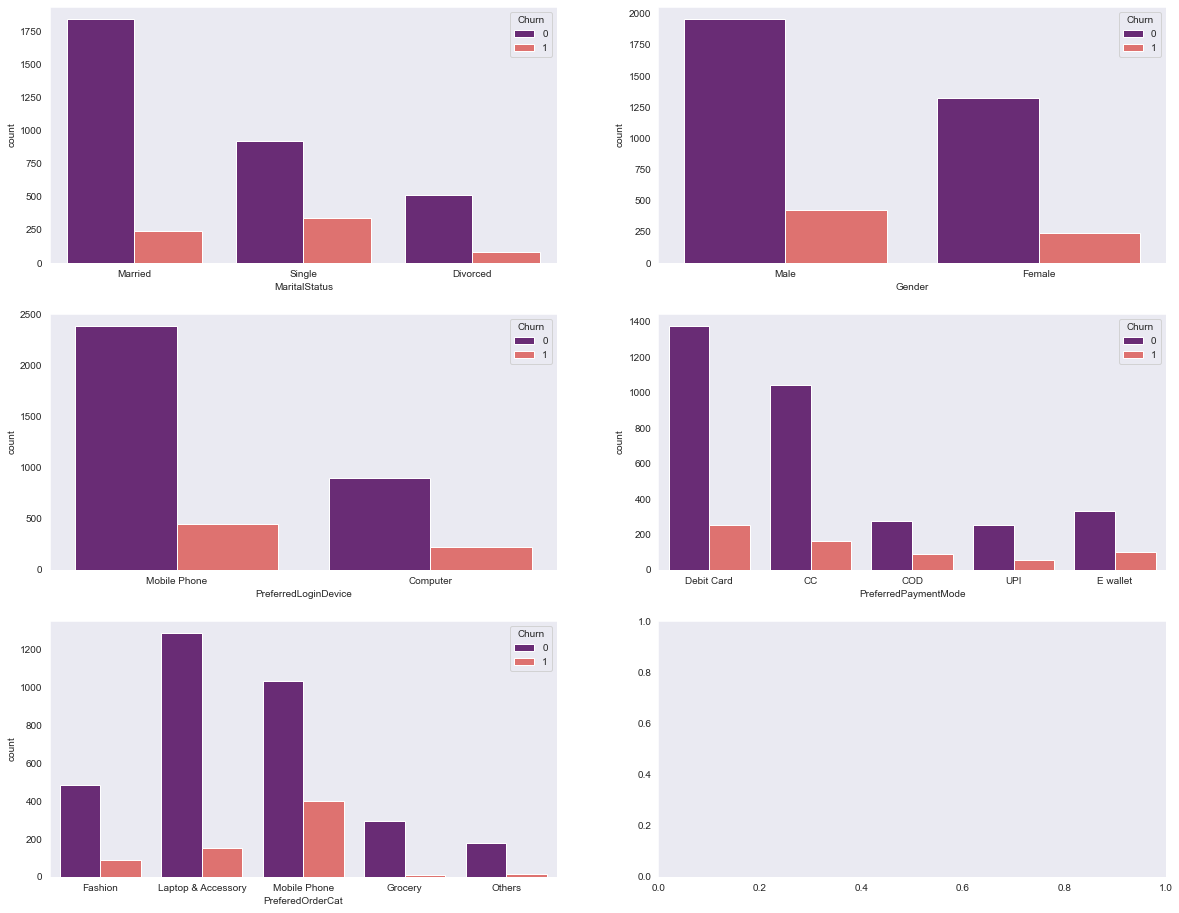

In [398]:
# Categorical EDA 
ctg_var = df_train[['MaritalStatus', 'Gender', 'PreferredLoginDevice', 
        'PreferredPaymentMode', 'PreferedOrderCat']]

# create 5 empty plots
fig, ax = plt.subplots(3, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, int in enumerate(ctg_var):
    sns.countplot(x = int, data = df_train, palette="magma", hue = 'Churn', ax = ax.flatten()[ix])

## *3.4 Scaling*

Selanjutnya adalah melihat fitur-fitur numerical mana yang perlu di scaling dan jenis scaling yang cocok untuk masing-masing jenis fitur.
Terlihat bahwa kita memiliki 2 tipe data numerik pada dataset, yaitu integer dan float. Pada data numerik integer, sangat jelas bahwa skala angka yang terdapat pada masing2 fitur tidak kontinu dan jumlah angka unique pada masing2 fitur masih sangat sedikit sehingga jarak angka tidak terlalu jauh. 

Namun, jika dilihat pada variabel yang memiliki float numerik, banyak ditemukan jenis data yang *discrete* pada beberapa fitur. Maka dari itu, sangat penting untuk dilakukan visualisasi lebih lanjut menggunakan *Boxplot* agar kita bisa melihat seberapa ekstrim outlier yang mereka miliki. Setelah itu, kita dapat menentukan tipe scaler yang sesuai dengan penyebaran datanya. 

MINMAX SCALER  
- `OrderAmountHikeFromlastYear`: fitur ini memiliki data outlier yang tidak begitu ekstrim tapi masih aman untuk menggunakan MinMax Scaler. 

ROBUST SCALER   
- `Tenure`
- `WarehouseToHome`
- `CouponUsed`
- `OrderCount`
- `DaySinceLastOrder`
- `CashbackAmount`  
Fitur diatas akan menggunakan Robust Scaler karena data outlier yang mereka miliki cukup ekstrim.

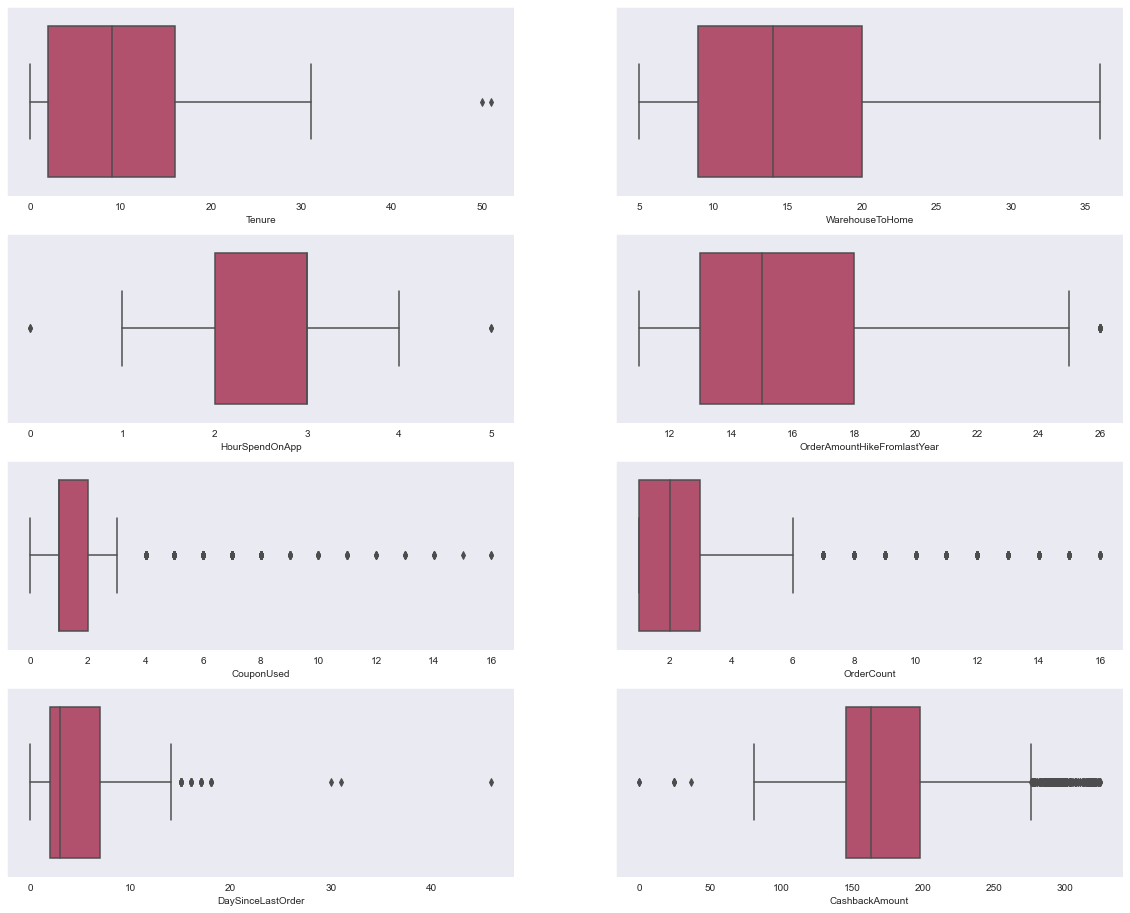

In [399]:
# Numerical EDA for float
float_var = df_train[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

# create 8 empty plots
fig, ax = plt.subplots(4, 2,figsize=(20,16))

# iterate those selected variables visualised in boxplot
for ix, num in enumerate(float_var):
    sns.boxplot(x = num, data = df_train, palette="flare", ax = ax.flatten()[ix])

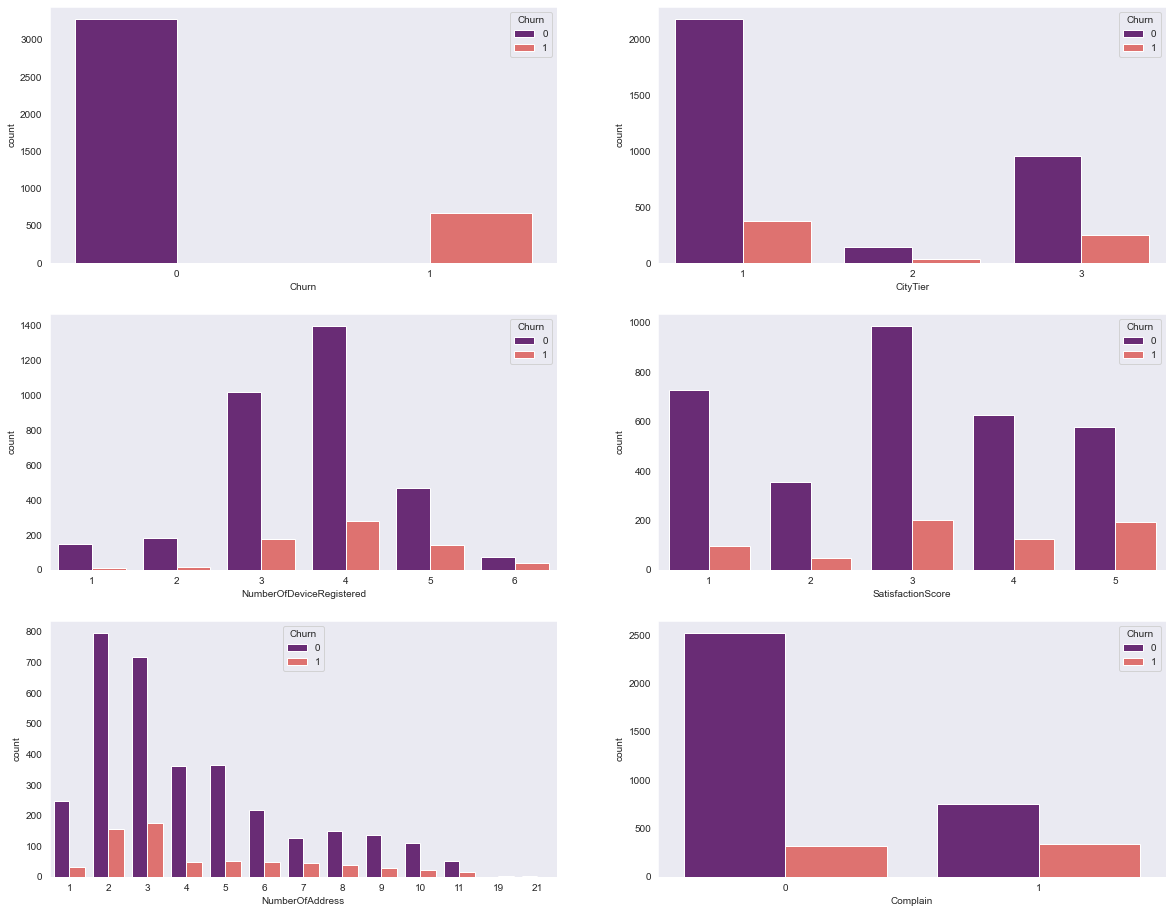

In [400]:
# Numerical EDA for integer
int_var = df_train[['Churn', 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']]

# create 6 empty plots
fig, ax = plt.subplots(3, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, int in enumerate(int_var):
    sns.countplot(x = int, data = df_train, palette="magma", hue = 'Churn', ax = ax.flatten()[ix])

## *3.5 Column Transformer*

Pertama, kita tentukan dulu fitur mana yang mau di-scale/encode. Setelah itu, kita melakukan pipeline dan column transformer pada masing-masing fitur yang akan di-scale/encode. 

Untuk sementara kita akan melakukan 2 jenis preprocessing, yaitu preprocessing dengan scaling untuk digunakan pada model linear seperti Logistic Regression dan KNN. Selanjutnya, preprocessing tanpa scaling yang umum digunakan untuk tree-based model karena scaling tidak dibutuhkan pada jenis model ini. 

In [401]:
# splitting data
X_train = df_train.drop('Churn', axis=1)
X_test = df_test.drop('Churn', axis=1)

y_train = df_train['Churn']
y_test = df_test['Churn']

> ### ***Preprocessing with scaler***

In [402]:
onehot_cols = ['MaritalStatus', 'Gender', 'PreferredLoginDevice', 
        'PreferredPaymentMode', 'PreferedOrderCat']

minmax_cols = ['OrderAmountHikeFromlastYear']

robust_cols = ['Tenure', 'WarehouseToHome', 'CouponUsed', 
        'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

other_num = ['CityTier', 'Complain', 'NumberOfAddress', 
        'SatisfactionScore', 'NumberOfDeviceRegistered', 
        'HourSpendOnApp']

In [403]:
# impute & encode categorical features
onehot_encoder = Pipeline([
    ('imputer',  SimpleImputer(strategy = 'constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# impute & scale features of robust scaler
robust_scaler= Pipeline([
    ('imputer', IterativeImputer()),
    ('robust', RobustScaler())
])

# impute & scale features of minmax scaler
minmax_scaler= Pipeline([
    ('imputer', IterativeImputer()),
    ('minmax', MinMaxScaler())
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor_1= ColumnTransformer([
        ('onehot', onehot_encoder, onehot_cols),
        ('robust', robust_scaler, robust_cols),
        ('minmax', minmax_scaler, minmax_cols),
        ('num imp', IterativeImputer(), other_num),
        
                                                  
], remainder = 'passthrough')


In [404]:
preprocessor_1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['MaritalStatus', 'Gender',
                                  'PreferredLoginDevice',
                                  'PreferredPaymentMode', 'PreferedOrderCat']),
                                ('robust',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer()),
                                                 ('robust'...),
                                 ['Tenure', 'WarehouseToHome', 'CouponUsed',
                                  'OrderCount', 'DaySinceLastOrder',
                                  'CashbackAmount']),
                                ('minmax',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer()),
                                                 ('minmax', MinMaxScaler())]),
                                 ['OrderAmountHikeFromlastYear']),
                                ('num imp', IterativeImputer(),
                                 ['CityTier', 'Complain', 'NumberOfAddress',
                                  'SatisfactionScore',
                                  'NumberOfDeviceRegistered',
                                  'HourSpendOnApp'])])

In [405]:
X_train_prep_1 = pd.DataFrame(preprocessor_1.fit_transform(X_train),columns=preprocessor_1.get_feature_names_out())
X_train_prep_1.head()

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,onehot__Gender_Male,onehot__PreferredLoginDevice_Mobile Phone,onehot__PreferredPaymentMode_COD,onehot__PreferredPaymentMode_Debit Card,onehot__PreferredPaymentMode_E wallet,onehot__PreferredPaymentMode_UPI,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,...,robust__OrderCount,robust__DaySinceLastOrder,robust__CashbackAmount,minmax__OrderAmountHikeFromlastYear,num imp__CityTier,num imp__Complain,num imp__NumberOfAddress,num imp__SatisfactionScore,num imp__NumberOfDeviceRegistered,num imp__HourSpendOnApp
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.5,1.2,0.845874,0.466667,3.0,0.0,2.0,1.0,3.0,2.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.5,0.8,0.783266,0.200000,1.0,0.0,4.0,4.0,3.0,2.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.5,-0.6,0.057055,0.533333,1.0,1.0,8.0,5.0,3.0,3.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,0.2,-0.607505,0.333333,3.0,1.0,2.0,4.0,3.0,3.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,1.0,0.227455,0.266667,1.0,0.0,3.0,3.0,5.0,4.0


In [406]:
X_train_prep_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   onehot__MaritalStatus_Married                3941 non-null   float64
 1   onehot__MaritalStatus_Single                 3941 non-null   float64
 2   onehot__Gender_Male                          3941 non-null   float64
 3   onehot__PreferredLoginDevice_Mobile Phone    3941 non-null   float64
 4   onehot__PreferredPaymentMode_COD             3941 non-null   float64
 5   onehot__PreferredPaymentMode_Debit Card      3941 non-null   float64
 6   onehot__PreferredPaymentMode_E wallet        3941 non-null   float64
 7   onehot__PreferredPaymentMode_UPI             3941 non-null   float64
 8   onehot__PreferedOrderCat_Grocery             3941 non-null   float64
 9   onehot__PreferedOrderCat_Laptop & Accessory  3941 non-null   float64
 10  

In [407]:
X_test_prep_1 = pd.DataFrame(preprocessor_1.fit_transform(X_test),columns=preprocessor_1.get_feature_names_out())
X_test_prep_1.head()

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,onehot__Gender_Male,onehot__PreferredLoginDevice_Mobile Phone,onehot__PreferredPaymentMode_COD,onehot__PreferredPaymentMode_Debit Card,onehot__PreferredPaymentMode_E wallet,onehot__PreferredPaymentMode_UPI,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,...,robust__OrderCount,robust__DaySinceLastOrder,robust__CashbackAmount,minmax__OrderAmountHikeFromlastYear,num imp__CityTier,num imp__Complain,num imp__NumberOfAddress,num imp__SatisfactionScore,num imp__NumberOfDeviceRegistered,num imp__HourSpendOnApp
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.5,-0.2,-0.574739,0.133333,1.0,0.0,6.0,1.0,3.0,2.000000
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,2.157064,0.533333,1.0,0.0,8.0,2.0,4.0,4.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.5,0.0,-0.634201,0.400000,1.0,0.0,1.0,2.0,4.0,2.866703
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.8,0.953045,0.333333,1.0,0.0,4.0,4.0,4.0,3.000000
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,-0.4,-0.436334,0.466667,3.0,0.0,3.0,1.0,3.0,2.000000


In [408]:
X_test_prep_1.shape

(1689, 25)

> ### ***Preprocessing without scaler***

In [409]:
# define all numerical features

num_cols = ['OrderAmountHikeFromlastYear', 'CityTier', 'Complain', 'NumberOfAddress', 
    'SatisfactionScore', 'NumberOfDeviceRegistered', 'HourSpendOnApp', 'Tenure', 
    'WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# impute & encode categorical features
onehot_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor_2 = ColumnTransformer([
        ('ctg', onehot_encoder, onehot_cols),
        ('num', IterativeImputer(), num_cols)
                                                  
], remainder = 'passthrough')


In [410]:
X_train_prep_2 = pd.DataFrame(preprocessor_2.fit_transform(X_train),columns=preprocessor_2.get_feature_names_out())
X_train_prep_2.head()

,ctg__MaritalStatus_Married,ctg__MaritalStatus_Single,ctg__Gender_Male,ctg__PreferredLoginDevice_Mobile Phone,ctg__PreferredPaymentMode_COD,ctg__PreferredPaymentMode_Debit Card,ctg__PreferredPaymentMode_E wallet,ctg__PreferredPaymentMode_UPI,ctg__PreferedOrderCat_Grocery,ctg__PreferedOrderCat_Laptop & Accessory,...,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,1.0,3.0,2.0,4.0,14.0,2.0,9.0,9.0,207.93
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,4.0,3.0,2.0,22.0,13.0,0.0,1.0,7.0,204.66
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,8.0,5.0,3.0,3.0,1.0,35.0,1.0,1.0,0.0,166.73
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,3.0,3.0,0.0,6.0,0.0,1.0,4.0,132.02
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,5.0,4.0,8.0,17.0,2.0,8.0,8.0,175.63


In [411]:
X_train_prep_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ctg__MaritalStatus_Married                3941 non-null   float64
 1   ctg__MaritalStatus_Single                 3941 non-null   float64
 2   ctg__Gender_Male                          3941 non-null   float64
 3   ctg__PreferredLoginDevice_Mobile Phone    3941 non-null   float64
 4   ctg__PreferredPaymentMode_COD             3941 non-null   float64
 5   ctg__PreferredPaymentMode_Debit Card      3941 non-null   float64
 6   ctg__PreferredPaymentMode_E wallet        3941 non-null   float64
 7   ctg__PreferredPaymentMode_UPI             3941 non-null   float64
 8   ctg__PreferedOrderCat_Grocery             3941 non-null   float64
 9   ctg__PreferedOrderCat_Laptop & Accessory  3941 non-null   float64
 10  ctg__PreferedOrderCat_Mobile Phone  

In [412]:
X_test_prep_2 = pd.DataFrame(preprocessor_2.transform(X_test),columns=preprocessor_2.get_feature_names_out())
X_test_prep_2.head()

,ctg__MaritalStatus_Married,ctg__MaritalStatus_Single,ctg__Gender_Male,ctg__PreferredLoginDevice_Mobile Phone,ctg__PreferredPaymentMode_COD,ctg__PreferredPaymentMode_Debit Card,ctg__PreferredPaymentMode_E wallet,ctg__PreferredPaymentMode_UPI,ctg__PreferedOrderCat_Grocery,ctg__PreferedOrderCat_Laptop & Accessory,...,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,3.0,2.000000,18.0,35.0,1.00000,1.0,3.0,134.52
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,8.0,2.0,4.0,4.000000,27.0,30.0,2.34839,4.0,9.0,267.75
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,2.738032,0.0,10.0,0.00000,3.0,4.0,131.62
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,3.000000,8.0,31.0,3.00000,4.0,8.0,209.03
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3.0,1.0,3.0,2.000000,12.0,26.0,1.00000,2.0,2.0,141.27


In [413]:
X_test_prep_2.shape

(1689, 25)

# **4. EVALUATION, MODEL SELECTION, AND MODEL TUNING**

Kita akan mencoba beberapa algoritma machine learning yang berbeda. Apapun modelnya, kita ingin model machine learning yang dapat menggeneralisasi dan memprediksi f1-score seakurat mungkin.

- Pertama, kita akan coba menggunakan basic model seperti Decision Tree, Logistic Regression, dan KNN
- Jika model pilihan pertama diatas tidak menghasilkan performance yang baik, maka kita akan coba menggunakan teknik *ensemble learning* seperti: Voting, Bagging, Random Forest, dan beberapa teknik Boosting. 

In [414]:
# define function for model performance

def model_evaluation(X_train, y_train, X_test, y_test, model, name):
  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  # Generate classification report
  print(classification_report(y_test, preds))
  print('Average F1 score on training set (5-fold CV):', cv_scores.mean())
  print('F1 score on testing set:', f1_score(y_test, preds))
  print('Confusion Matrix on testing set:\n',confusion_matrix(y_test, preds))

  # Create dictionaries
  train = {'model': name, 'category': 'training', 'score': cv_scores.mean()}
  test = {'model': name, 'category': 'testing', 'score': f1_score(y_test, preds)}
  result = [train, test]

  return pd.DataFrame.from_records(result)

In [415]:
evaluation = pd.DataFrame(columns=['model', 'category', 'score'])
evaluation

,model,category,score


## *4.1 Decision Tree*

Pada model Decision Tree, kita menggunakan data preprocessing yang tanpa Scaling dikarenakan tree-based model tidak sensitif terhadap variance data. 

Jika kita melihat hasil nilai f-1 antara train set (cross validation 5 fold) dan test set, dapat disimpulkan bahwa penggunaan model Decision Tree mengalami sedikit overfitting. Disini nilai precisionnya dikategorikan masih rendah yang dapat diartikan bahwa nilai False Positive yang tinggi. 

Ini menjadi salah satu alasan, model Decision Tree mungkin tidak terlalu optimal dalam menangani dataset ini. 

In [416]:
dt = DecisionTreeClassifier(random_state=88, 
                    max_leaf_nodes=100,
                    class_weight='balanced'
                    )

result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test, dt, 'DecisionTreeClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1405
           1       0.61      0.92      0.74       284

    accuracy                           0.89      1689
   macro avg       0.80      0.90      0.83      1689
weighted avg       0.92      0.89      0.90      1689

Average F1 score on training set (5-fold CV): 0.7050544386952292
F1 score on testing set: 0.7355021216407355
Confusion Matrix on testing set:
 [[1242  163]
 [  24  260]]


## *4.2 Logistic Regression*

Data yang kita gunakan adalah data preprocessing yang telah di-scale dan di-encode.

Jika kita melihat hasil score f1 antara data train (cross validation 5 fold) dan data test dibawah, penggunaan model Logistic Regression sepertinya tidak menyebabkan overfitting melainkan underfitting. Model ini menghasilkan f1 score yang tidak terlalu bagus, hanya sekitar 0.59 dengan performa Precision yang rendah.   

Model Logistic Regression sangat sensitif dengan multicollinearity karena akan menyebabkan penurunan pada nilai precision. Oleh karena itu, nilai f1-score pun ikut menurun. Dengan alasan ini, mungkin kita bisa mencoba model lain. 

In [417]:
lr = LogisticRegression(random_state=88, 
                    penalty='l2', 
                    max_iter=1000, 
                    class_weight='balanced'
                )

result = model_evaluation(X_train_prep_1, y_train, X_test_prep_1, y_test, lr, 'LogisticRegression')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1405
           1       0.44      0.86      0.59       284

    accuracy                           0.79      1689
   macro avg       0.70      0.82      0.72      1689
weighted avg       0.88      0.79      0.82      1689

Average F1 score on training set (5-fold CV): 0.5858672273375392
F1 score on testing set: 0.5854241338112306
Confusion Matrix on testing set:
 [[1097  308]
 [  39  245]]


## *4.3 KNN*

Persis dengan Logistic Regression datas, data yang kita gunakan adalah data preprocessing yang telah di-scale dan di-encode.

Pada model KNN, hasil score f1 antara training (cross validation 5 fold) dan testing lumayan memiliki jarak yang jauh sekitar 0.05. Dapat disimpulkan bahwa penggunaan model KNN menyebabkan sedikit overfitting. Semakin tinggi nilai n_neighbours yang dimasukkan, semakin rendah nilai Recall sehingga mempengaruhi nilai f1-score.

Penggunaan model KNN memang cenderung overfitting bisa disebabkan oleh data kita yang lumayan besar dengan fitur yang kompleks. Oleh karena itu, kita akan mencoba teknik *Ensemble Method*.


In [418]:
knn = KNeighborsClassifier()

result = model_evaluation(X_train_prep_1, y_train, X_test_prep_1, y_test, knn, 'KNN')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      1405
           1       0.74      0.50      0.60       284

    accuracy                           0.89      1689
   macro avg       0.83      0.73      0.77      1689
weighted avg       0.88      0.89      0.88      1689

Average F1 score on training set (5-fold CV): 0.5585185382638385
F1 score on testing set: 0.6008403361344538
Confusion Matrix on testing set:
 [[1356   49]
 [ 141  143]]


## *4.4 Voting*

Voting adalah salah satu teknik ensemble yang didefinisikan sebagai teknik pengambilan prediksi berdasarkan suara terbanyak / rekomendasi maksimum dari beberapa model (base learners). Disini base learners yang kita pakai yaitu: Logistic Regression, Decision Tree, dan KNN. 

Dari analisa nilai F1 pada training (cross validation 5 fold), kita dapat melihat selisih yang lumayan dekat dimana selisih antara training dan testing mencapai 0.02 yang menandakan performa model lumayan stabil namun trade-off pada nilai precision yang cenderung rendah. 

In [419]:
base_learners = [
    ('log_reg', LogisticRegression(random_state=88, 
                                    penalty='l2', 
                                    max_iter=1000, 
                                    class_weight='balanced')),
    ('dt', DecisionTreeClassifier(random_state=88, 
                                    max_leaf_nodes=100,
                                    class_weight='balanced')),
    ('knn', KNeighborsClassifier())
]
voting_classifier = VotingClassifier(estimators=base_learners, voting='soft')

result = model_evaluation(X_train_prep_1, y_train, X_test_prep_1, y_test, voting_classifier, 'VotingClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1405
           1       0.67      0.87      0.76       284

    accuracy                           0.91      1689
   macro avg       0.82      0.89      0.85      1689
weighted avg       0.92      0.91      0.91      1689

Average F1 score on training set (5-fold CV): 0.7419972373833789
F1 score on testing set: 0.76
Confusion Matrix on testing set:
 [[1286  119]
 [  37  247]]


## *4.5 Random Forest*

Random Forest adalah teknik Bagging yang terdiri dari sejumlah model decision tree pada berbagai kelompok dari dataset yang ada. 
Berbeda dengan Decision Tree yang hanya memiliki satu pohon keputusan, Random Forest menghasilkan prediksi dari setiap pohon keputusan yang ada dan mengambil nilai prediksi yang paling banyak dipilih sebagai hasil terakhir.

Sama dengan Decision Tree, pada Random Forest kita akan memakai data preprocessing yang tanpa scaling. Dari analisa nilai f1 pada training (cross validation 5 fold) dan testing, didapatkan bahwa selisih skor-nya tidak berbeda jauh. Namun nilainya bisa dibilang tidak terlalu tinggi yang berada di nilai 0.72 dengan performa Precision yang rendah. Dengan alasan ini, kita coba menggunakan teknik Boosting.


In [420]:
rf = RandomForestClassifier(random_state=88, 
                            n_estimators=100,
                            class_weight = 'balanced', 
                            criterion = 'entropy', 
                            max_depth = 13, 
                            min_samples_split = 0.01)


result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test, rf, 'RandomForestClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1405
           1       0.64      0.83      0.72       284

    accuracy                           0.89      1689
   macro avg       0.80      0.87      0.83      1689
weighted avg       0.91      0.89      0.90      1689

Average F1 score on training set (5-fold CV): 0.7178076871975553
F1 score on testing set: 0.7197549770290964
Confusion Matrix on testing set:
 [[1271  134]
 [  49  235]]


## *4.6 AdaBoost*

Boosting pertama yang kita coba adalah AdaBoost atau Adaptive Boosting. Cara kerja dari algoritma pada model seperti cara kerja teknik Boosting pada umumnya.

Disini kita akan menjadikan DecisionTree sebagai base estimator dan menggunakan olahan fitur dari hasil preprocessing yang tanpa scaling. Dapat dilihat kita menggunakan Decision Tree sebagai base estimator-nya. 

Dapat diketahui hasil f1 pada train set (cross validation 5 fold) dan test set tidak terlalu beda jauh yaitu 0.67/0.65. Namun terlihat nilai Recall yang tidak optimal hanya sekitar 0.56 yang artinya angka False Negatif yang tinggi dimana dalam kasus Churn, ini sangat krusial.

Model AdaBoost sangat sensitif pada data outlier, oleh karena itu menyebabkan nilai f1-score kurang optimal. Maka dari itu model AdaBoost merupakan model yang belum layak kita gunakan.

In [421]:
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=88)

dtclf.fit(X_train_prep_2, y_train)
y_val_pred = dtclf.predict(X_test_prep_2)
print(f1_score(y_test, y_val_pred))


0.555205047318612


In [422]:
# default parameter

ab = AdaBoostClassifier(base_estimator=dtclf,
                        learning_rate=0.6,
                        n_estimators=98,
                        algorithm='SAMME.R'
                        ) 


result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test, ab, 'AdaBoostClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1405
           1       0.77      0.56      0.64       284

    accuracy                           0.90      1689
   macro avg       0.84      0.76      0.79      1689
weighted avg       0.89      0.90      0.89      1689

Average F1 score on training set (5-fold CV): 0.6753711237360588
F1 score on testing set: 0.6448979591836734
Confusion Matrix on testing set:
 [[1357   48]
 [ 126  158]]


## *4.7 XGBoost*

Setelah melihat hasil f1-score pada model Random Forest dan AdaBoost yang belum terlalu optimal, kita akan mencoba XGBoost sebagai pilihan kedua pada teknik Boosting. Kelebihan utama XGBoost dibanding yang lain ada pada kecepatan dalam melakukan training. 

Setelah kita coba jalankan model ini, dapat disimpulkan bahwa hasil f1-score pada test set yang berada di angka 0.89 lebih tinggi dari train set yaitu 0.84; selisih mencapai 0.05. Nilai pada Precision dan Recall juga tinggi dan seimbang yang artinya jika Precision bernilai lebih tinggi berarti algoritma pada model tersebut mampu memprediksi hasil yang lebih relevan daripada yang tidak relevan, dan nilai Recall yang tinggi berarti suatu algoritma pada model mampu memprediksi kelas positif dengan akurat. 

Maka dari itu, model XGBoost merupakan model yang lebih layak dari model yang lain. Namun, bukan berarti proses training model berhenti disini saja. Saya akan mencoba teknik Boosting selanjutnya yaitu CatBoost untuk melihat apakah kita bisa mendapatkan performa yang lebih baik pada nilai f1 dan recall.


In [423]:
xgb = XGBClassifier(n_estimators = 100, 
                    max_depth = 7, 
                    n_jobs = -1, 
                    eval_metric = 'logloss', 
                    gamma = 1,
                    random_state=88)
result = model_evaluation(X_train_prep_2, y_train, X_test_prep_2, y_test,  xgb, 'XGBClassifier')
evaluation = evaluation.append(result)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1405
           1       0.93      0.85      0.89       284

    accuracy                           0.96      1689
   macro avg       0.95      0.92      0.93      1689
weighted avg       0.96      0.96      0.96      1689

Average F1 score on training set (5-fold CV): 0.8371681569471174
F1 score on testing set: 0.8880733944954129
Confusion Matrix on testing set:
 [[1386   19]
 [  42  242]]


## *4.8 CatBoost*

Tidak seperti XGBoost dimana pohon tumbuh secara asimetris, pohon-pohon pada Catboost ditanam secara simetris sehingga semua pohon seimbang. Karakteristik pohon seimbang (balanced tree) ini memberikan beberapa manfaat, termasuk kemampuan untuk mengontrol/mendeteksi masalah overfitting dan waktu inferensi yang lebih rendah. CatBoost melakukan ini dengan menggunakan kondisi yang sama di setiap pemisahan pada node masing-masing pohon.

Kelebihan utama pada CatBoost terletak pada kemampuan model untuk menangani berbagai jenis fitur secara otomatis terutama pada fitur kategoris. Disini, kita hanya memberi tahu Catboost fitur mana yang merupakan fitur kategoris dengan menggunakan parameter `cat_features`. Oleh karena itu, diperlukan melakukan data preprocessing tanpa encoding ataupun scaling. 

Kelebihan lainnya adalah CatBoost lebih cepat dari XGBoost dalam menjalankan training pada data yang artinya kita bisa menghemat waktu lebih banyak. 

Meskipun f1 score pada train set 100% akurat, nilai f1 pada test set juga sama tingginya yaitu di angka 0.91 terlepas adanya selisih sebesar 0.09 dimana selisih antara nilai masih normal. 

In [424]:
# Preprocessing without scaler and encoding

# define numerical features
ctg_cols = ['MaritalStatus', 'Gender', 'PreferredLoginDevice', 
        'PreferredPaymentMode', 'PreferedOrderCat']

num_cols = ['OrderAmountHikeFromlastYear', 'CityTier', 'Complain', 'NumberOfAddress', 
    'SatisfactionScore', 'NumberOfDeviceRegistered', 'HourSpendOnApp', 'Tenure', 
    'WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# impute categorical features 
ctg_cols_prep = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value='Missing')),
])

# impute numerical feature
num_cols_prep = Pipeline([
    ('imputer', IterativeImputer())
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor_3 = ColumnTransformer([
        ('ctg', ctg_cols_prep, ctg_cols),
        ('num', num_cols_prep, num_cols)         
], remainder = 'passthrough')

X_train_prep_3 = pd.DataFrame(preprocessor_3.fit_transform(X_train),columns=preprocessor_3.get_feature_names_out())
X_train_prep_3.head()

,ctg__MaritalStatus,ctg__Gender,ctg__PreferredLoginDevice,ctg__PreferredPaymentMode,ctg__PreferedOrderCat,num__OrderAmountHikeFromlastYear,num__CityTier,num__Complain,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,Married,Male,Mobile Phone,Debit Card,Fashion,18.0,3.0,0.0,2.0,1.0,3.0,2.0,4.0,14.0,2.0,9.0,9.0,207.93
1,Married,Male,Mobile Phone,Debit Card,Fashion,14.0,1.0,0.0,4.0,4.0,3.0,2.0,22.0,13.0,0.0,1.0,7.0,204.66
2,Married,Male,Mobile Phone,CC,Laptop & Accessory,19.0,1.0,1.0,8.0,5.0,3.0,3.0,1.0,35.0,1.0,1.0,0.0,166.73
3,Single,Female,Mobile Phone,COD,Mobile Phone,16.0,3.0,1.0,2.0,4.0,3.0,3.0,0.0,6.0,0.0,1.0,4.0,132.02
4,Married,Male,Computer,COD,Laptop & Accessory,15.0,1.0,0.0,3.0,3.0,5.0,4.0,8.0,17.0,2.0,8.0,8.0,175.63


In [425]:
X_test_prep_3 = pd.DataFrame(preprocessor_3.transform(X_test),columns=preprocessor_3.get_feature_names_out())
X_test_prep_3.head()

,ctg__MaritalStatus,ctg__Gender,ctg__PreferredLoginDevice,ctg__PreferredPaymentMode,ctg__PreferedOrderCat,num__OrderAmountHikeFromlastYear,num__CityTier,num__Complain,num__NumberOfAddress,num__SatisfactionScore,num__NumberOfDeviceRegistered,num__HourSpendOnApp,num__Tenure,num__WarehouseToHome,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount
0,Single,Male,Mobile Phone,CC,Mobile Phone,13.0,1.0,0.0,6.0,1.0,3.0,2.0,18.0,35.0,1.0,1.0,3.0,134.52
1,Single,Female,Mobile Phone,Debit Card,Grocery,19.0,1.0,0.0,8.0,2.0,4.0,4.0,27.0,30.0,2.34839,4.0,9.0,267.75
2,Divorced,Male,Computer,Debit Card,Mobile Phone,17.0,1.0,0.0,1.0,2.0,4.0,2.738032,0.0,10.0,0.0,3.0,4.0,131.62
3,Divorced,Male,Mobile Phone,COD,Fashion,16.0,1.0,0.0,4.0,4.0,4.0,3.0,8.0,31.0,3.0,4.0,8.0,209.03
4,Married,Male,Computer,Debit Card,Laptop & Accessory,18.0,3.0,0.0,3.0,1.0,3.0,2.0,12.0,26.0,1.0,2.0,2.0,141.27


In [426]:
params = {"iterations": 1000,
         "eval_metric": "F1",
         "random_state":88,         
        }
cat_tr = Pool(
    data= X_train_prep_3, label=y_train, 
    cat_features= ['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)
cat_val = Pool(data=X_test_prep_3, label=y_test, 
    cat_features=['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)

In [427]:
cat = CatBoostClassifier(**params)
cat.fit(cat_tr, eval_set=cat_val, early_stopping_rounds=100, use_best_model=True, verbose=10)

Learning rate set to 0.044466
0:	learn: 0.5741544	test: 0.5753968	best: 0.5753968 (0)	total: 14.1ms	remaining: 14.1s
10:	learn: 0.5700576	test: 0.5201794	best: 0.5753968 (0)	total: 84.2ms	remaining: 7.57s
20:	learn: 0.6328413	test: 0.5859873	best: 0.5859873 (20)	total: 128ms	remaining: 5.95s
30:	learn: 0.6479925	test: 0.6085106	best: 0.6085106 (30)	total: 170ms	remaining: 5.31s
40:	learn: 0.6722533	test: 0.6209850	best: 0.6244726 (35)	total: 215ms	remaining: 5.03s
50:	learn: 0.6876155	test: 0.6439232	best: 0.6452991 (49)	total: 330ms	remaining: 6.14s
60:	learn: 0.6996337	test: 0.6553911	best: 0.6610526 (59)	total: 380ms	remaining: 5.84s
70:	learn: 0.7226739	test: 0.6666667	best: 0.6694737 (67)	total: 423ms	remaining: 5.54s
80:	learn: 0.7388193	test: 0.6847599	best: 0.6875000 (79)	total: 498ms	remaining: 5.65s
90:	learn: 0.7546501	test: 0.7010309	best: 0.7010309 (88)	total: 536ms	remaining: 5.35s
100:	learn: 0.7720524	test: 0.7180527	best: 0.7195122 (98)	total: 574ms	remaining: 5.11s
11

In [428]:
print('CatBoost f-1 score Train: ', f1_score(y_train, cat.predict(cat_tr)))
print('CatBoost f-1 score Test: ', f1_score(y_test, cat.predict(cat_val)))

print('Classif Train:\n',classification_report(y_train, cat.predict(cat_tr)))
print('Confusion Matrix CatBoost Train:\n',confusion_matrix(y_train, cat.predict(cat_tr) ))

print('===================')

print('Classif Val:\n',classification_report(y_test, cat.predict(cat_val)))
print('Confusion Matrix CatBoost Val:\n',confusion_matrix(y_test, cat.predict(cat_val)))

CatBoost f-1 score Train:  0.9954682779456193
CatBoost f-1 score Test:  0.9157509157509158
Classif Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      0.99      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941

Confusion Matrix CatBoost Train:
 [[3276    1]
 [   5  659]]
Classif Val:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1405
           1       0.95      0.88      0.92       284

    accuracy                           0.97      1689
   macro avg       0.97      0.94      0.95      1689
weighted avg       0.97      0.97      0.97      1689

Confusion Matrix CatBoost Val:
 [[1393   12]
 [  34  250]]


In [429]:
train = {'model': 'CatBoostClassifier', 'category': 'training', 'score': f1_score(y_train, cat.predict(cat_tr))}
test = {'model': 'CatBoostClassifier', 'category': 'testing', 'score': f1_score(y_test, cat.predict(cat_val))}
result = [train, test]

evaluation = evaluation.append(result)

In [430]:
f1_score(y_test, cat.predict_proba(cat_val)[:,1] >= 0.5)

0.9157509157509158

## *4.9 Model Visualisation*

Setelah melakukan training dan testing menggunakan 8 model di atas, kita dapat melakukan visualisasi untuk melihat model mana yang memiliki nilai F1 score (harmonic mean recall dan precision) tertinggi.

Didapatkan bahwa model CatBoost memiliki score f1 yang paling tertinggi dari model yang lainnya diikuti oleh XGBoost dan Voting Classifier. Model dengan nilai f1 paling terkecil adalah Logistic Regression dan KNN. 

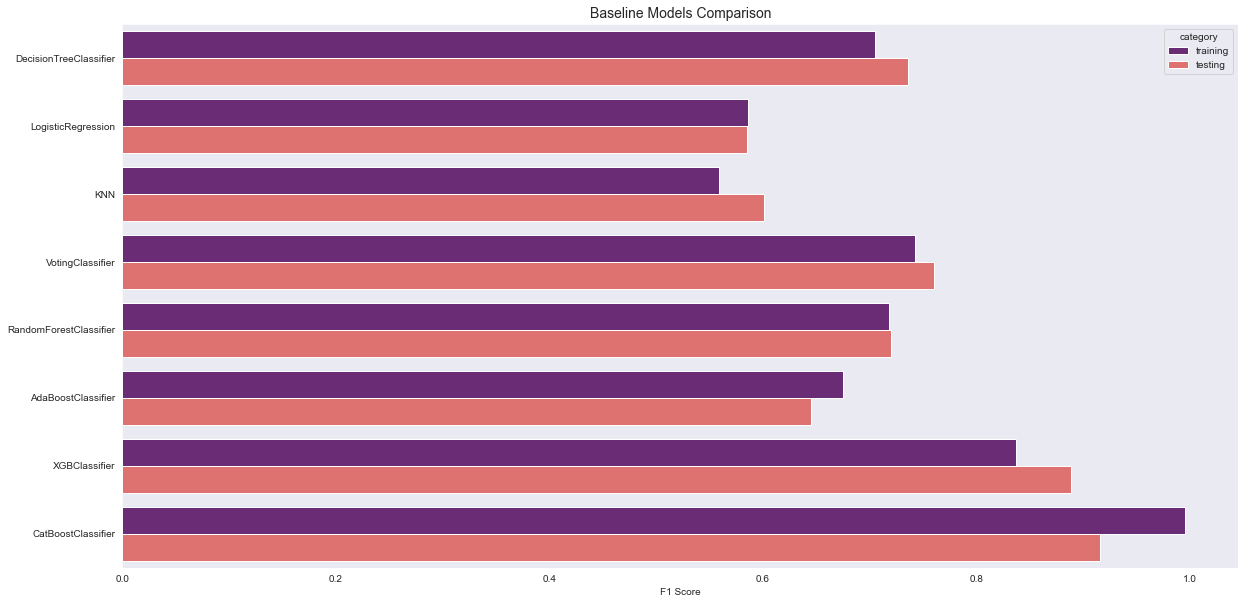

In [431]:
plt.figure(figsize=(20, 10))
sns.barplot(y='model', x='score', data=evaluation, hue='category', palette='magma')
plt.title('Baseline Models Comparison', size=14)
plt.ylabel('')
plt.xlabel('F1 Score')
plt.show()

# **5. HYPERPARAMETER TUNING & METRIC ANALYSIS**

Dikarenakan model Catboost yang memiliki nilai f1-score paling tinggi dibanding model lainnya, model ini akan menjadi pilihan utama yang akan kita gunakan untuk proses selanjutnya. Namun karena adanya sedikit overfitting, kita akan mencoba untuk melakukan Hyperparameter Tuning pada CatBoost menggunakan metode GridSearchCV. Setelah itu kita akan melakukan analisis matrik dari hasil yang kita dapatkan setelah tuning.

## *5.1 Hyperparameter Tuning*

In [432]:
cat_clf = CatBoostClassifier()

param_space = { 'iterations' : [1000, 1500],
                'depth' : [5, 7, 10],
                'learning_rate': [0.01],  
                'l2_leaf_reg': [5, 10, 15, 20],
                'eval_metric': ['F1'],
                'random_state' : [88],
                'od_type' : ['Iter'],
                'od_wait' : [100, 200]
            }

grid_cat = GridSearchCV(estimator=cat_clf, param_grid = param_space, cv = 5, n_jobs=-1)
    

grid_cat.fit(X_train_prep_2, y_train)

0:	learn: 0.6198934	total: 54.6ms	remaining: 1m 21s
1:	learn: 0.6063433	total: 83.2ms	remaining: 1m 2s
2:	learn: 0.6193182	total: 99.8ms	remaining: 49.8s
3:	learn: 0.6542404	total: 118ms	remaining: 44.3s
4:	learn: 0.6566885	total: 134ms	remaining: 40.2s
5:	learn: 0.6728625	total: 153ms	remaining: 38.2s
6:	learn: 0.6722689	total: 170ms	remaining: 36.4s
7:	learn: 0.6740947	total: 188ms	remaining: 35.1s
8:	learn: 0.6790353	total: 198ms	remaining: 32.9s
9:	learn: 0.6777470	total: 213ms	remaining: 31.7s
10:	learn: 0.6887052	total: 232ms	remaining: 31.4s
11:	learn: 0.6897810	total: 250ms	remaining: 30.9s
12:	learn: 0.6807339	total: 275ms	remaining: 31.4s
13:	learn: 0.7042766	total: 296ms	remaining: 31.4s
14:	learn: 0.7024568	total: 306ms	remaining: 30.3s
15:	learn: 0.7026532	total: 324ms	remaining: 30.1s
16:	learn: 0.7109091	total: 345ms	remaining: 30.1s
17:	learn: 0.7097361	total: 358ms	remaining: 29.5s
18:	learn: 0.7013699	total: 372ms	remaining: 29s
19:	learn: 0.6990826	total: 386ms	remai

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd8d7063ac0>,
             n_jobs=-1,
             param_grid={'depth': [5, 7, 10], 'eval_metric': ['F1'],
                         'iterations': [1000, 1500],
                         'l2_leaf_reg': [5, 10, 15, 20],
                         'learning_rate': [0.01], 'od_type': ['Iter'],
                         'od_wait': [100, 200], 'random_state': [88]})

In [433]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid_cat.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_cat.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_cat.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9599074842536656

 The best parameters across ALL searched params:
 {'depth': 10, 'eval_metric': 'F1', 'iterations': 1500, 'l2_leaf_reg': 5, 'learning_rate': 0.01, 'od_type': 'Iter', 'od_wait': 100, 'random_state': 88}


## *5.2 Create Model with Best Parameter*

Setelah kita mengetahui parameter terbaik dari hasil *Parameter Tuning* diatas, maka langkah selanjutnya adalah menjalankan model yang kita pilih tadi, yaitu CatBoost dengan parameter terbaik yang kita dapatkan.

Hasil yang kita dapatkan setelah menggunakan parameter terbaik dari GridSearch menunjukkan perubahan yang sedikit. Sebelumnya nilai score kita pada test set hanya sekitar 0.91. Setelah di-tuning, score f1 pada test set menjadi 0.92. Meskipun perbedaannya kecil, kita akan menggunakan model CatBoost dengan parameter yang didapat setelah hyperparameter tuning. 

In [434]:
best_params = {'depth': 10, 
            'eval_metric': 'F1', 
            'iterations': 1500, 
            'l2_leaf_reg': 5, 
            'learning_rate': 0.01, 
            'od_type': 'Iter', 
            'od_wait': 100, 
            'random_state': 88,
        }
        
cat_tr = Pool(
    data= X_train_prep_3, label=y_train, 
    cat_features= ['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)
cat_val = Pool(data=X_test_prep_3, label=y_test, 
    cat_features=['ctg__MaritalStatus', 'ctg__Gender', 'ctg__PreferredLoginDevice', 
    'ctg__PreferredPaymentMode', 'ctg__PreferedOrderCat']
)

In [435]:
cat_tuned = CatBoostClassifier(**best_params)
cat_tuned.fit(cat_tr, eval_set=cat_val, early_stopping_rounds=100, use_best_model=True, verbose=10)

0:	learn: 0.6346863	test: 0.5965665	best: 0.5965665 (0)	total: 25.3ms	remaining: 38s
10:	learn: 0.6666667	test: 0.5982533	best: 0.6090713 (1)	total: 159ms	remaining: 21.5s
20:	learn: 0.6703911	test: 0.5807860	best: 0.6090713 (1)	total: 300ms	remaining: 21.2s
30:	learn: 0.6881919	test: 0.6004320	best: 0.6090713 (1)	total: 441ms	remaining: 20.9s
40:	learn: 0.6967742	test: 0.6017316	best: 0.6196581 (34)	total: 580ms	remaining: 20.6s
50:	learn: 0.7186068	test: 0.6353945	best: 0.6353945 (50)	total: 730ms	remaining: 20.7s
60:	learn: 0.7287671	test: 0.6384778	best: 0.6398305 (56)	total: 922ms	remaining: 21.7s
70:	learn: 0.7493213	test: 0.6610526	best: 0.6610526 (69)	total: 1.11s	remaining: 22.3s
80:	learn: 0.7565611	test: 0.6610526	best: 0.6638655 (76)	total: 1.26s	remaining: 22.1s
90:	learn: 0.7713004	test: 0.6779661	best: 0.6779661 (88)	total: 1.43s	remaining: 22.1s
100:	learn: 0.7807487	test: 0.6835443	best: 0.6863158 (99)	total: 1.6s	remaining: 22.2s
110:	learn: 0.7996485	test: 0.6960168	

In [436]:
print('CatBoost f-1 score Train: ', f1_score(y_train, cat_tuned.predict(cat_tr)))
print('CatBoost f-1 score Test: ', f1_score(y_test, cat_tuned.predict(cat_val)))

print('Classif Train:\n',classification_report(y_train, cat_tuned.predict(cat_tr)))
print('Confusion Matrix CatBoost Train:\n',confusion_matrix(y_train, cat_tuned.predict(cat_tr) ))

print('===================')

print('Classif Val:\n',classification_report(y_test, cat_tuned.predict(cat_val)))
print('Confusion Matrix CatBoost Val:\n',confusion_matrix(y_test, cat_tuned.predict(cat_val)))

CatBoost f-1 score Train:  0.9969788519637462
CatBoost f-1 score Test:  0.9219330855018587
Classif Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      0.99      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941

Confusion Matrix CatBoost Train:
 [[3277    0]
 [   4  660]]
Classif Val:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1405
           1       0.98      0.87      0.92       284

    accuracy                           0.98      1689
   macro avg       0.98      0.93      0.95      1689
weighted avg       0.98      0.98      0.97      1689

Confusion Matrix CatBoost Val:
 [[1399    6]
 [  36  248]]


## *5.3 Threshold Adjustment*

Dikarenakan nilai recall masih lebih tinggi daripada nilai precision, maka kita akan mengubah nilai threshold yang awalnya bernilai nilai standard (0.5) menjadi 0.1. Hasilnya, walaupun nilai F1 turun dari sebelumnya, tapi nilai recall mencapai angka prediksi dari 87% menjadi 97%. 

In [437]:
print('Classif Val:\n',classification_report(y_test, cat_tuned.predict_proba(cat_val)[:,1] >= 0.1)) 
print('Confusion Matrix CatBoost Val:\n',confusion_matrix(y_test, cat_tuned.predict_proba(cat_val)[:,1] >= 0.1))

Classif Val:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1405
           1       0.71      0.97      0.82       284

    accuracy                           0.93      1689
   macro avg       0.85      0.94      0.89      1689
weighted avg       0.94      0.93      0.93      1689

Confusion Matrix CatBoost Val:
 [[1291  114]
 [   9  275]]


## *5.4 ROC AUC Score*

- **Sensitivity / True Positive Rate / Recall** tells us what proportion of the positive class got correctly classified.

    Formula: TP/(TP+FN)

    Example: proportion of the actual people who churn that were correctly detected by the model.

- **False Negative Rate** tells us what proportion of the positive class got incorrectly classified by the classifier. A higher TPR and a lower FNR is desirable if we want to correctly classify the positive class.

    Formula: FN/(TP+FN)

- **Specificity / True Negative Rate** tells us what proportion of the negative class got correctly classified.

    Formula: TN/(TN+FP)

    Example: proportion of people who won't churn were correctly identified by the model.

- **False Positive Rate** tells us what proportion of the negative class got incorrectly classified by the classifier. A higher TNR and a lower FPR is desirable if we want to correctly classify the negative class.

    Formula: FP/(TN+FP) = 1 - Specificity

**The Receiver Operator Characteristic (ROC) curve**  
An evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

**The higher the AUC**, **the better the performance** of the model at distinguishing between the positive and negative classes. Disini, model kita menghasilkan AUC score sebesar 0.94 yang dikategorikan sebagai nilai yang outstanding dalam membedakan kelas positif dan negatif. 

Source: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

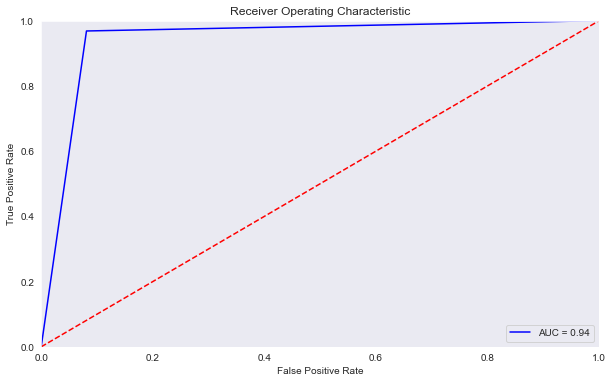

In [438]:
# calculate the fpr and tpr for all thresholds of the classification
probs = cat_tuned.predict_proba(cat_val)
preds = probs[:,1] >= 0.1
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

CONFUSION MATRIX - TEST SET


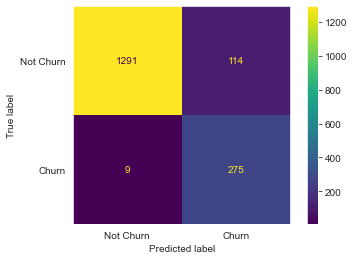

In [439]:
y_test_pred = cat_tuned.predict_proba(cat_val)[:,1] >= 0.1
confusion_matrix_catboost = confusion_matrix(y_test, y_test_pred)

print("CONFUSION MATRIX - TEST SET")
ConfusionMatrixDisplay(confusion_matrix_catboost, display_labels=np.array(['Not Churn', 'Churn'])).plot();

# **6. FEATURE IMPORTANCE BY SHAP**

Untuk mendapatkan gambaran tentang fitur mana yang paling penting untuk sebuah model, kita dapat memplot nilai SHAP dari setiap fitur untuk setiap sampel.

Pada **grafik pertama** menunjukkan fitur yang paling mempengaruhi model dalam meningkatkan prediksi. Disimpulkan bahwa fitur `Tenure` yang sangat memberikan pengaruh tinggi pada hasil prediksi diikuti dengan fitur `Complain`, `MaritalStatus`, `PreferredOrderCat`, dan seterusnya. 

Pada **grafik kedua** dengan konsep visualisasi yang berbeda. Plot ini tidak saja mengurutkan fitur berdasarkan jumlah besaran nilai SHAP pada semua sampel, tapi juga menggunakan nilai SHAP untuk menunjukkan dampak distribusi yang dimiliki setiap fitur pada output model. Keterangan lebih lanjut dapat dilihat dibawah ini:
- Kumpulan titik-titik yang membentuk warna adalah titik yang kita dapat dari setiap data observasi
- Warna biru berarti data observasi yang memiliki nilai rendah
- Warna merah berarti data observasi yang memiliki nilai tinggi
- Warna abu-abu mengindikasikan kategori pada fitur tidak terbaca karena masih dalam tipe numerik. 

Text(0.5, 1.0, 'SHAP Importance')

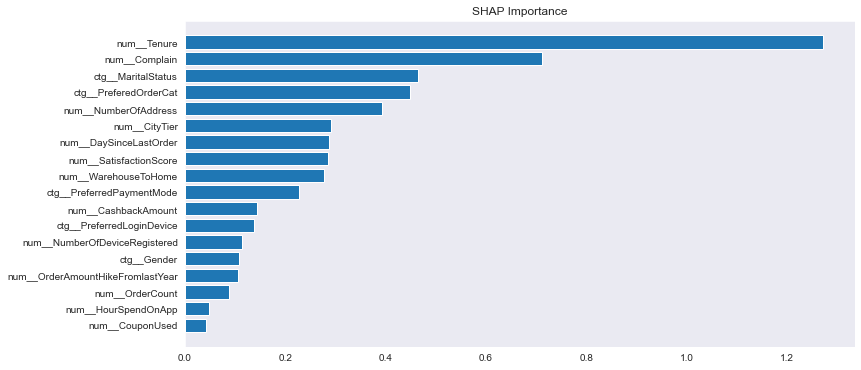

In [440]:
explainer = shap.Explainer(cat_tuned)
shap_values = explainer(X_test_prep_3)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test_prep_3.columns)[sorted_idx])
plt.title('SHAP Importance')

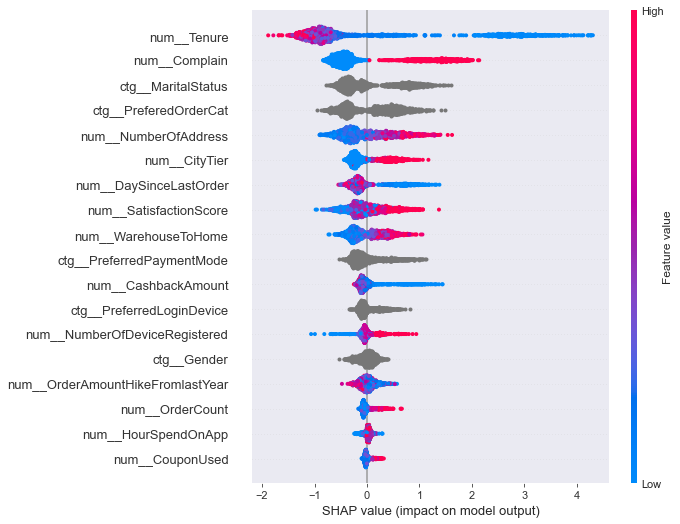

In [441]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=20)

## *6.1 Analisis Feature Importance*

1. `Tenure`  
   Semakin singkat berlangganan, potensi churn semakin meningkat

2. `Complain`  
   Semakin banyak complain, potensi churn semakin meningkat

3. `NumberOfAddress`  
   Semakin banyak jumlah alamat yang terdaftar, potensi churn semakin meningkat

4. `DaySinceLastOrder`  
   Semakin singkat interval pemesanan, potensi churn semakin meningkat

5. `SatisfactionScore`  
   Semakin tinggi nilai kepuasan, potensi churn semakin meningkat

6. `CityTier`  
   Semakin tinggi tingkat Tier pada suatu kota,  potensi churn semakin meningkat
    
7. `WarehouseToHome`  
   Semakin jauh jarak dari gudang ke rumah, potensi churn semakin meningkat

8. `CashbackAmount`  
   Semakin sedikit jumlah cashback yang didapatkan, potensi churn semakin meningkat

# **7. CONCLUSION AND RECOMMENDATION**

## 7.1 Conclusion

Berdasarkan performa model machine learning yang telah dibangun, didapatkan bahwa performa model CatBoost yang sangat baik dengan menghasilkan nilai F1 score sekitar 0.82 dan Recall 0.97. Kita dapat menyimpulkan bahwa bila seandainya model kita ini digunakan untuk memfilter/menyaring list pelanggan yang akan menjadi target pemasaran kita, maka model kita dapat mendeteksi 97% pelanggan yang akan churn, dan model kita mendapatkan 92% pelanggan yang memilih untuk retain/stay (semua ini berdasarkan recallnya).

Model kita ini memiliki ketepatan prediksi pelanggan yang tidak churn sebesar 71% (precision). Jadi setiap model kita memprediksi bahwa seorang kandidat itu tidak churn, maka kemungkinan tebakannya benar itu sebesar 71% kurang lebih. Maka masih akan ada pelanggan yang sebenarnya tidak churn tetapi diprediksi sebagai pelanggan yang churn sekitar 26% dari keseluruhan pelanggan yang tidak churn (berdasarkan recall).

Bila seandainya biaya untuk retention cost (ex: offer up to 50% discount) per pelanggan itu $20, dan andaikan jumlah pelanggan yang kita miliki untuk suatu kurun waktu sebanyak 200 orang (ie. 100 orang tidak churn, dan 100 orang lagi churn), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua pelanggan kita check dan diberikan diskon):

    Total Biaya => 200 x 20 USD = 4,000 USD
    Total pelanggan yang churn dapat diskon => 100 orang (karena semua kita tawarkan)
    Total pelanggan yang churn tidak dapat diskon => 0 orang (karena semua kita tawarkan)
    Biaya yang terbuang => 100 x 20 USD = 2000 USD (karena 100 orang tidak churn akan menggunakan diskon ini padahal mereka sudah pernah menggunakan tawaran ini artinya biaya yang dikeluarkan menjadi sia-sia)
    Jumlah penghematan => 0 USD

Dengan Model (hanya kandidat yang diprediksi oleh model churn yang kita check dan tawarkan) :

    Total Biaya => (97 x 20 USD) + (26 x 20 USD) = 1940 USD + 520 USD = 2460 USD 
    Total pelanggan churn yang dikirimkan diskon => 97 orang (karena recall 1/yg tidak churn itu 97%)
    Total pelanggan churn  yang tidak dikirimkan diskon => 3 orang (karena recall 1/yg tidak churn itu 97%)
    Biaya yang terbuang => 26 x 20 USD = 520 USD (berdasarkan recall 0/yg tidak churn (26 orang mendapatkan diskon yang sudah pernah dikirimkan))
    Jumlah penghematan => 92 x 20 USD = 1,840 USD (yang dihitung hanya yang memang tidak churn saja, kalau yang churn tapi tidak ditawarkan itu tidak dihitung disini)

Maka dengan menggunakan model ini, diasumsikan tim marketing mampu menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah pelanggan berpotensial churn.

CLASSIFICATION REPORT - CATBOOST TUNED:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1405
           1       0.71      0.97      0.82       284

    accuracy                           0.93      1689
   macro avg       0.85      0.94      0.89      1689
weighted avg       0.94      0.93      0.93      1689

CONFUSION MATRIX - CATBOOST TUNED


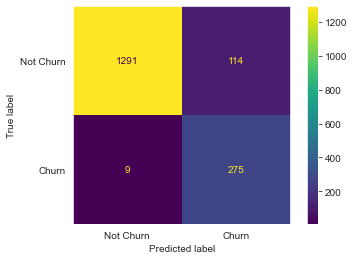

In [442]:
y_test_pred = cat_tuned.predict_proba(cat_val)[:,1] >= 0.1
confusion_matrix_catboost = confusion_matrix(y_test, y_test_pred)


print('CLASSIFICATION REPORT - CATBOOST TUNED:\n', classification_report(y_test, y_test_pred) )

print("CONFUSION MATRIX - CATBOOST TUNED")
ConfusionMatrixDisplay(confusion_matrix_catboost, display_labels=np.array(['Not Churn', 'Churn'])).plot();

## 7.2 Recommendation

Hal-hal yang bisa dilakukan untuk meningkatkan performa project dan modelnya menjadi lebih akurat:

1. Meningkatkan sistem database pada aplikasi atau website agar aktifitas pelanggan dapat tersimpan secara otomatis yang bertujuan untuk mengurangi missing values pada feature real time seperti `HourSpendOnApp`, `DaySinceLastOrder`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`. 

2. Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan dengan informasi para pelanggan, seperti mengirimkan online survey melalui email diimingi dengan 'reward' berupa voucher discount jika survey telah diisi dan dikirimkan.

3. Mencoba algorithm ML yang lain yang lebih optimal atau mencoba melakukan hyperparameter tuning kembali pada model yang dipilih. Terutama jika ada seasonal campaign seperti diskon besar-besaran disaat tanggal & bulan yang sama atau hari libur besar nasional. 

4. Menganalisa data-data yang model kita masih salah prediksi untuk mengetahui alasannya dan karakteristiknya bagaimana.



Berdasarkan analisa feature importance dan hasil EDA, kita memiliki beberapa 5 rekomendasi penting yang dapat menjadi bahan pertimbangan bagi perusahaan dalam menurunkan tingkat churn. 

1. Untuk pengguna dengan masa tenure 0-1 bulan, bisa diberikan insentif (bisa berupa package promo cashback, discount, atau loyalty program) agar potensi churn terhadap pengguna baru menurun. Tindakan kecil ini mampu mempertahankan 15% pelanggan yang siap untuk churn.

2. Untuk menangani komplain dari pelanggan, mungkin diperlukan peningkatan fungsi pada aplikasi atau website di bagian pengaduan yang lebih responsif agar pengguna tetap nyaman menggunakan jasa/produk walaupun ada masalah yang muncul tiba-tiba. Salah satu contoh dari tindakan ini adalah membuat semacam *customer feedback loop* seperti WA chat, online survey, chat bots atau email-follow up. 

3. Untuk meningkatkan interval pemesanan, kita bisa membuat program *subscription* seperti Amazon Prime ke pelanggan baru dengan menyediakan 30-day free trial pada jasa/produk yang disediakan dengan benefit eksklusif tambahan yang banyak diinginkan oleh pelanggan yang tidak bisa diakses oleh pelanggan biasa. Dengan cara ini, pelanggan menjadi penasaran untuk tetap memesan dan menikmati produk/jasa lainnya. 

4. Selain itu infrastruktur pelayanan e-commerce kemungkinan besar juga belum maksimal dalam menjangkau kondisi di wilayah Tier 2 dan Tier 3. Sehingga kita perlu meningkatkan penjangkauan pelayanan di wilayah Tier 2 dan Tier 3 guna meningkatkan profit dari para pelanggan di wilayah tersebut seperti kerja sama dengan ekspedisi lokal dan membuka kantor cabang disana.

5. Memberikan insentif berupa pengurangan biaya ongkos kirim kepada pelanggan yang memiliki jarak yang jauh terhadap gudang, bisa dengan melakukan kerja sama dengan pihak jasa pengantar (kurir) untuk meringankan cost dari perusahaan.


Source Links: 
- https://blog.hubspot.com/service/how-to-reduce-customer-churn
- https://blog.hubspot.com/service/customer-retention-strategies




----

# **THANK YOU**